In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
import missingno as msno
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [11]:
# Descarga de datos
# ======================
file = ('https://raw.githubusercontent.com/JorgeMendiProject/TFM/main/DatasetInterpolado.csv')

# Lectura de datos a partir del archivo .csv             

df = pd.read_csv(file, delimiter=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Fecha          216 non-null    object 
 1   TasaTPIB       216 non-null    float64
 2   EuriborM       216 non-null    float64
 3   ParoT          216 non-null    float64
 4   SalarioMedio   216 non-null    int64  
 5   IPC            216 non-null    float64
 6   CTotalConsumo  216 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 11.9+ KB


In [12]:
# Convertimos la variable Fecha
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
df = df.set_index('Fecha')

#Creamos las variables con año y mes para analizar las series temporales

df['Year'] = df.index.year
df['Month'] = df.index.month

In [13]:
list_to_plot = ['TasaTPIB','EuriborM',
       'ParoT', 'SalarioMedio', 'IPC', 'CTotalConsumo']   

In [14]:
# P- valor
# la prueba ADF sirve para comprobar si existe estacionalidad en las variables, Cuando el estadístico de prueba es menor que el valor crítico mostrado, rechaza la hipótesis nula e infiere que la serie de tiempo es estacional. Si adf es menor que el P-valor se infiere que hay estacionalidad

from statsmodels.tsa.stattools import adfuller
for i in list_to_plot:
  X = df[i].values
  X = np.nan_to_num(X)
  result = adfuller(X)
  print(i), print('ADF Statistic: %f' % result[0]), print('p-value: %f' % result[1]), print('Critical Values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


TasaTPIB
ADF Statistic: -2.059265
p-value: 0.261206
Critical Values:
	1%: -3.462
	5%: -2.875
	10%: -2.574
EuriborM
ADF Statistic: -1.323494
p-value: 0.618357
Critical Values:
	1%: -3.462
	5%: -2.876
	10%: -2.574
ParoT
ADF Statistic: -1.596919
p-value: 0.485141
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.575
SalarioMedio
ADF Statistic: -1.544738
p-value: 0.511276
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574
IPC
ADF Statistic: -2.854744
p-value: 0.050869
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574
CTotalConsumo
ADF Statistic: -1.679969
p-value: 0.441461
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574


TasaTPIB


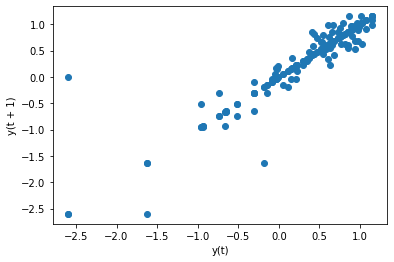

EuriborM


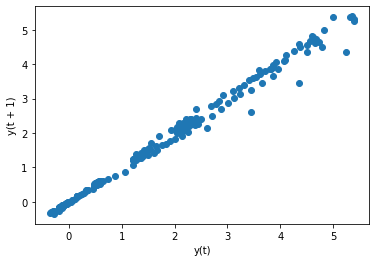

ParoT


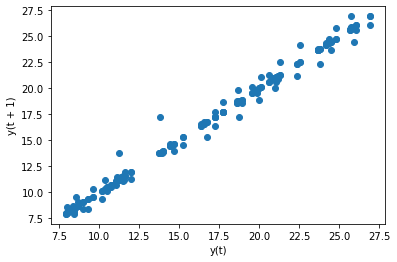

SalarioMedio


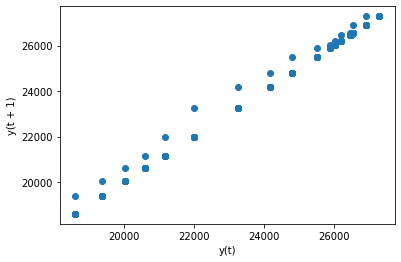

IPC


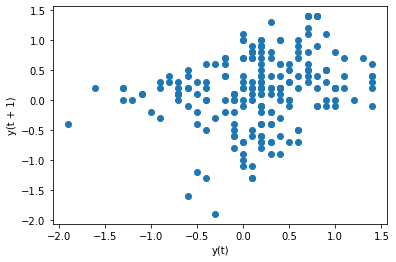

CTotalConsumo


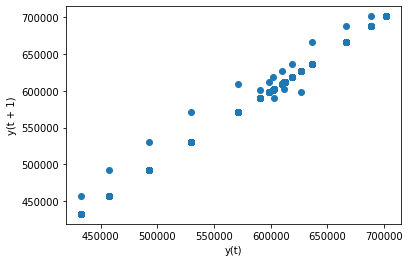

In [15]:
#Factores autorregresivos de las variables, se puede interpretar que las variables TasaPIB, EuriborM, ParoT, SalarioMedio, tiene un factor autorregresivo lo que implica que lo que esta pasando en el momento T actual tiene que ver con lo que el valor que alcanzó la variable en el momento anterior.
#Sin embargo en el caso del IPC existe una mayor dispersión y parece que no existe esta relación.
from pandas.plotting import lag_plot
for i in list_to_plot:
  print(i)
  lag_plot(df[i])
  plt.show()

In [16]:
df_diff = df.diff()
df_diff['Year'] = df['Year']
df_diff['Month'] = df['Month']

In [17]:
# P- valor
# la prueba ADF sirve para comprobar si existe estacionalidad en las variables, Cuando el estadístico de prueba es menor que el valor crítico mostrado, rechaza la hipótesis nula e infiere que la serie de tiempo es estacional. Si adf es menor que el P-valor se infiere que hay estacionalidad

from statsmodels.tsa.stattools import adfuller
for i in list_to_plot:
  X = df_diff[i].values
  X = np.nan_to_num(X)
  result = adfuller(X)
  print(i), print('ADF Statistic: %f' % result[0]), print('p-value: %f' % result[1]), print('Critical Values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

TasaTPIB
ADF Statistic: -8.094911
p-value: 0.000000
Critical Values:
	1%: -3.462
	5%: -2.875
	10%: -2.574
EuriborM
ADF Statistic: -4.164230
p-value: 0.000757
Critical Values:
	1%: -3.462
	5%: -2.876
	10%: -2.574
ParoT
ADF Statistic: -2.404200
p-value: 0.140555
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574
SalarioMedio
ADF Statistic: -2.162349
p-value: 0.220193
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574
IPC
ADF Statistic: -7.471842
p-value: 0.000000
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574
CTotalConsumo
ADF Statistic: -2.296775
p-value: 0.173010
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574


TasaTPIB


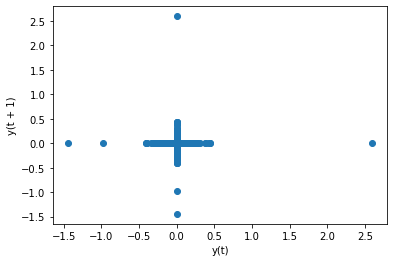

EuriborM


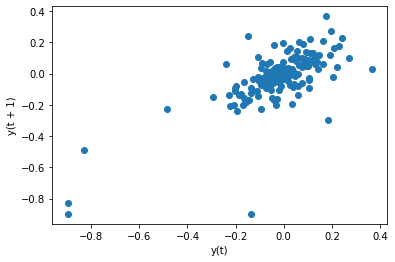

ParoT


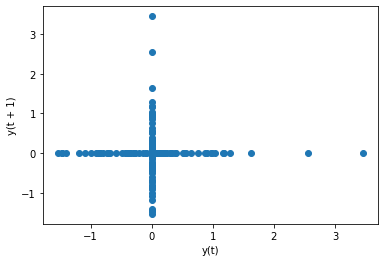

SalarioMedio


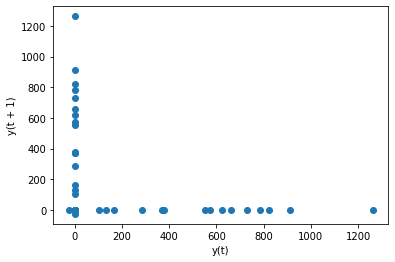

IPC


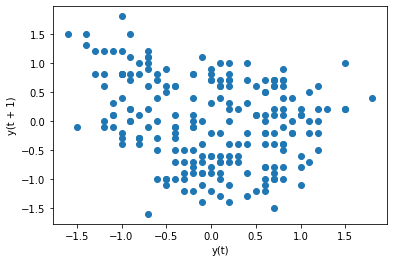

CTotalConsumo


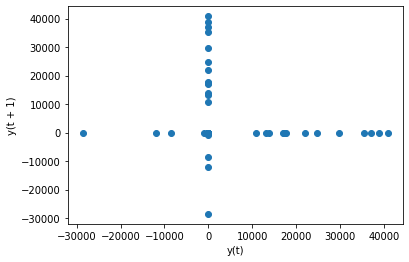

In [18]:
#Factores autorregresivos de las variables, se puede interpretar que las variables TasaPIB, EuriborM, ParoT, SalarioMedio, tiene un factor autorregresivo lo que implica que lo que esta pasando en el momento T actual tiene que ver con lo que el valor que alcanzó la variable en el momento anterior.
#Sin embargo en el caso del IPC existe una mayor dispersión y parece que no existe esta relación.
from pandas.plotting import lag_plot
for i in list_to_plot:
  print(i)
  lag_plot(df_diff[i])
  plt.show()

In [19]:
df_diff_diff = df.diff().diff()
df_diff_diff['Year'] = df['Year']
df_diff_diff['Month'] = df['Month']

In [20]:
# P- valor
# la prueba ADF sirve para comprobar si existe estacionalidad en las variables, Cuando el estadístico de prueba es menor que el valor crítico mostrado, rechaza la hipótesis nula e infiere que la serie de tiempo es estacional. Si adf es menor que el P-valor se infiere que hay estacionalidad

from statsmodels.tsa.stattools import adfuller
for i in list_to_plot:
  X = df_diff_diff[i].values
  X = np.nan_to_num(X)
  result = adfuller(X)
  print(i), print('ADF Statistic: %f' % result[0]), print('p-value: %f' % result[1]), print('Critical Values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

TasaTPIB
ADF Statistic: -8.538005
p-value: 0.000000
Critical Values:
	1%: -3.462
	5%: -2.876
	10%: -2.574
EuriborM
ADF Statistic: -7.787195
p-value: 0.000000
Critical Values:
	1%: -3.462
	5%: -2.876
	10%: -2.574
ParoT
ADF Statistic: -3.741941
p-value: 0.003560
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574
SalarioMedio
ADF Statistic: -27.521516
p-value: 0.000000
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574
IPC
ADF Statistic: -8.390140
p-value: 0.000000
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574
CTotalConsumo
ADF Statistic: -16.497829
p-value: 0.000000
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574


TasaTPIB


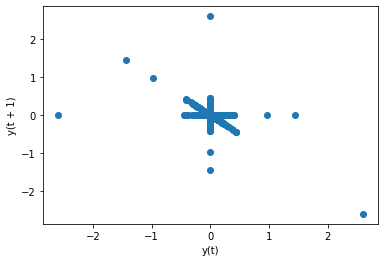

EuriborM


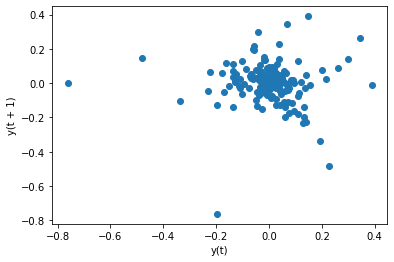

ParoT


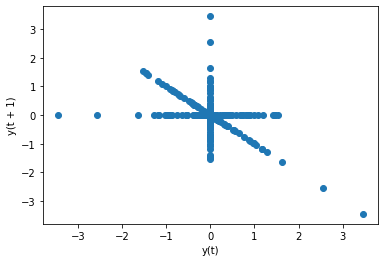

SalarioMedio


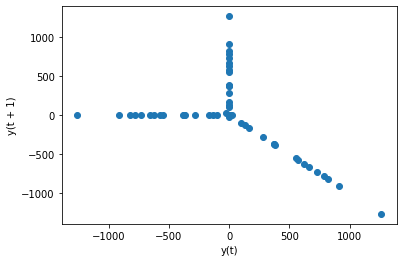

IPC


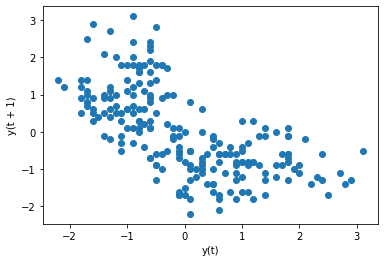

CTotalConsumo


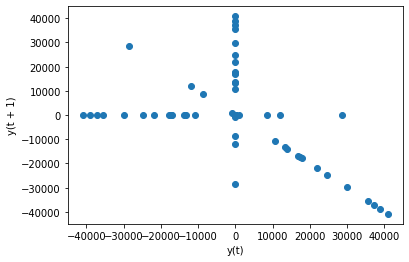

In [21]:
#Factores autorregresivos de las variables, se puede interpretar que las variables TasaPIB, EuriborM, ParoT, SalarioMedio, tiene un factor autorregresivo lo que implica que lo que esta pasando en el momento T actual tiene que ver con lo que el valor que alcanzó la variable en el momento anterior.
#Sin embargo en el caso del IPC existe una mayor dispersión y parece que no existe esta relación.
from pandas.plotting import lag_plot
for i in list_to_plot:
  print(i)
  lag_plot(df_diff_diff[i])
  plt.show()

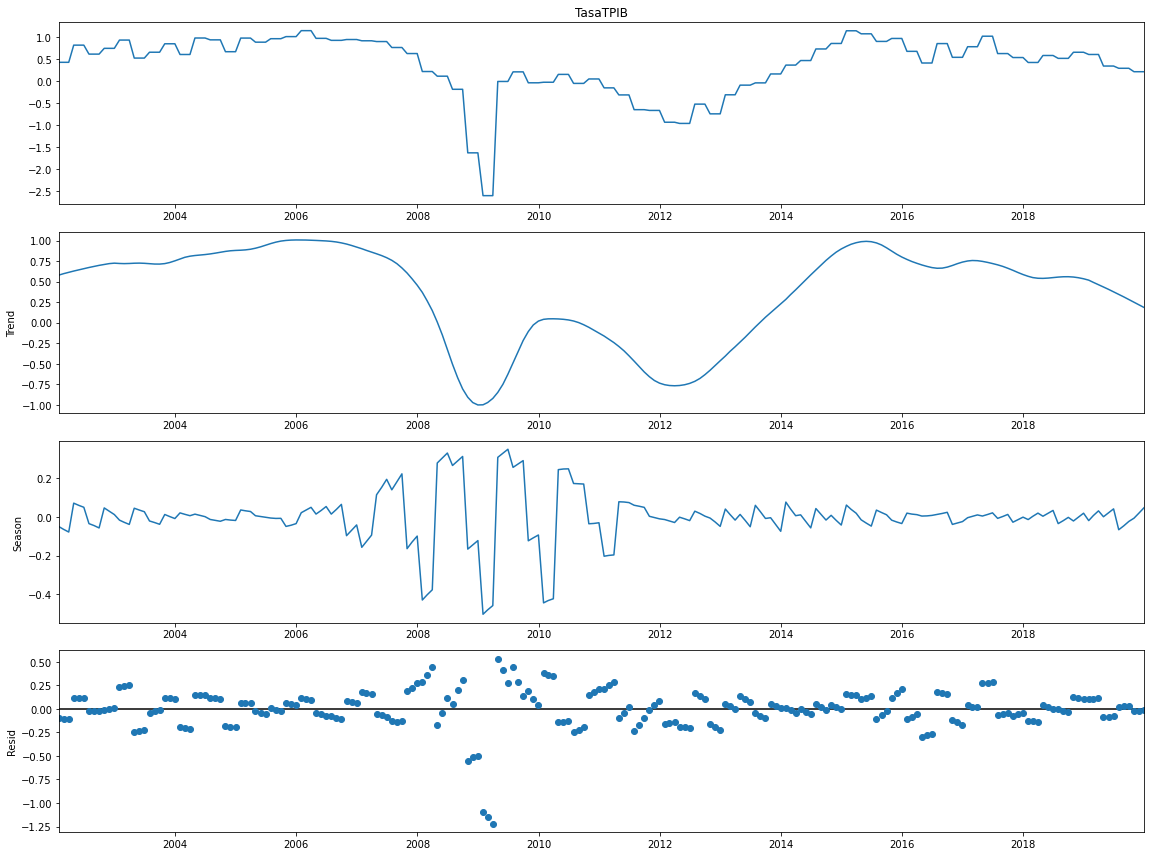

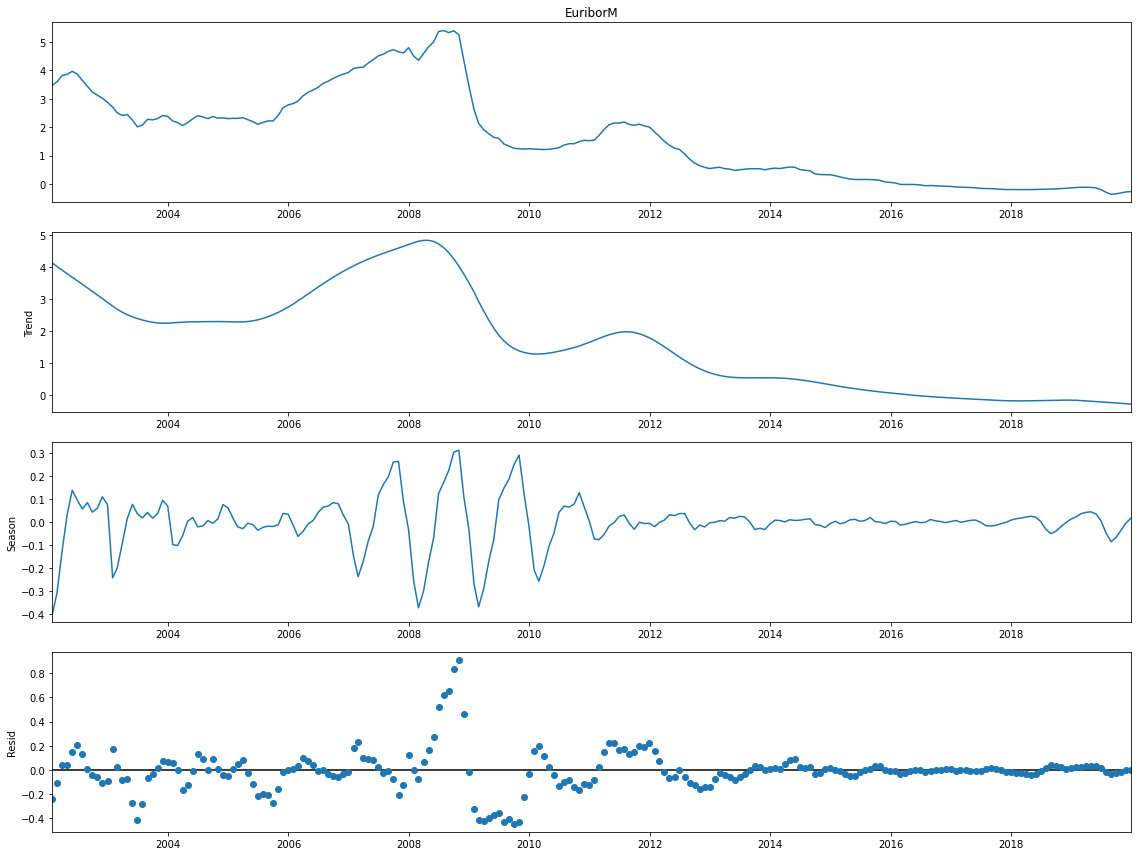

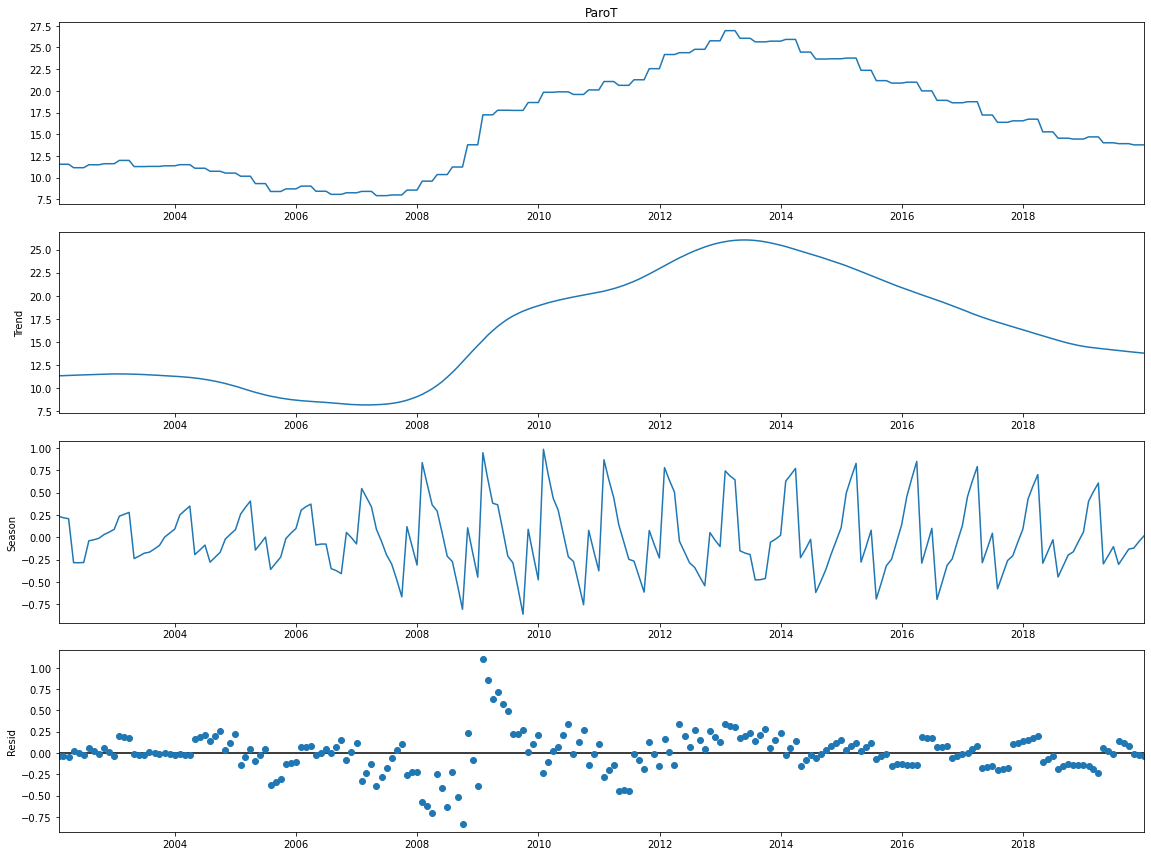

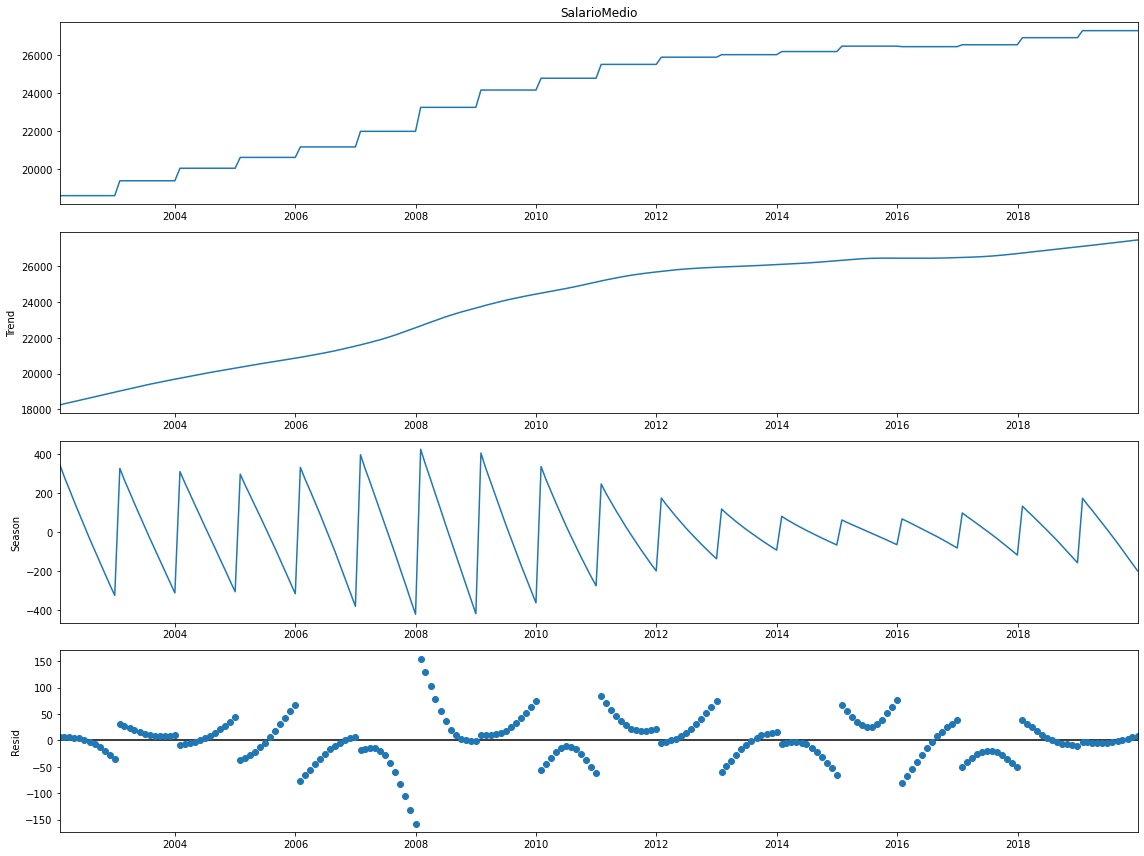

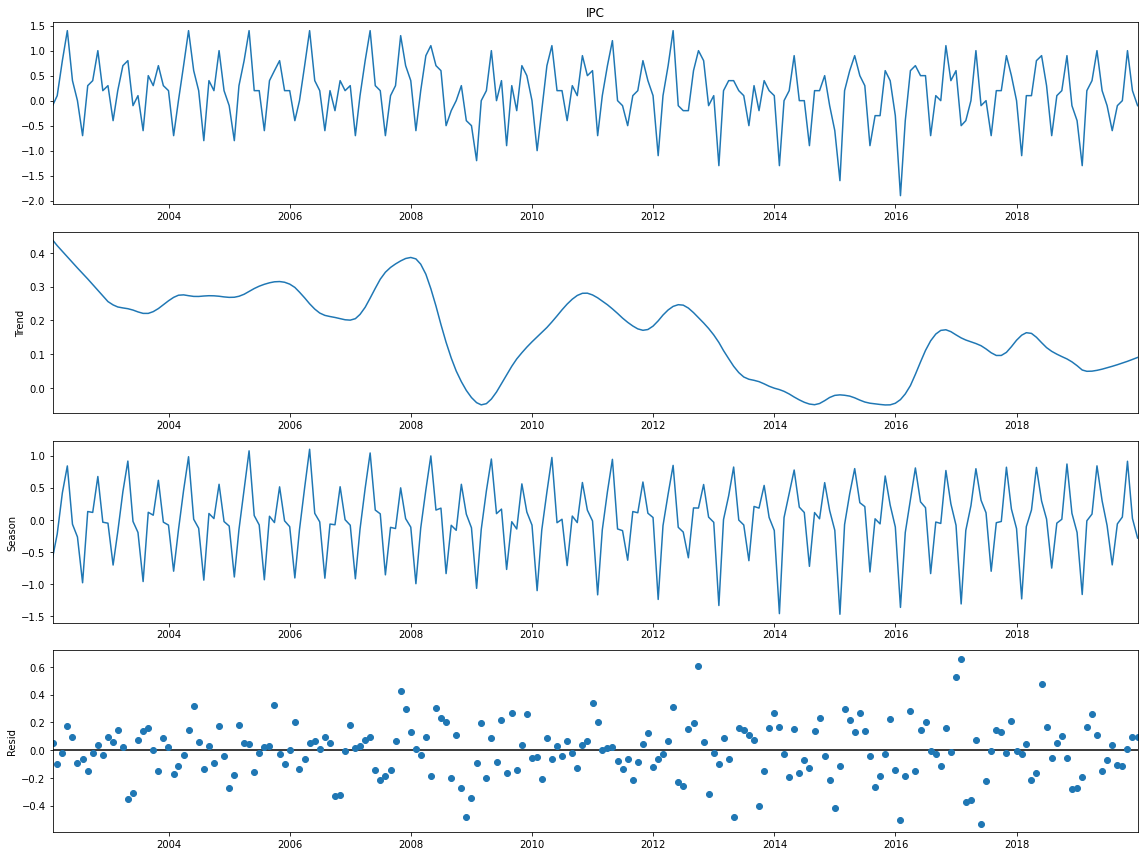

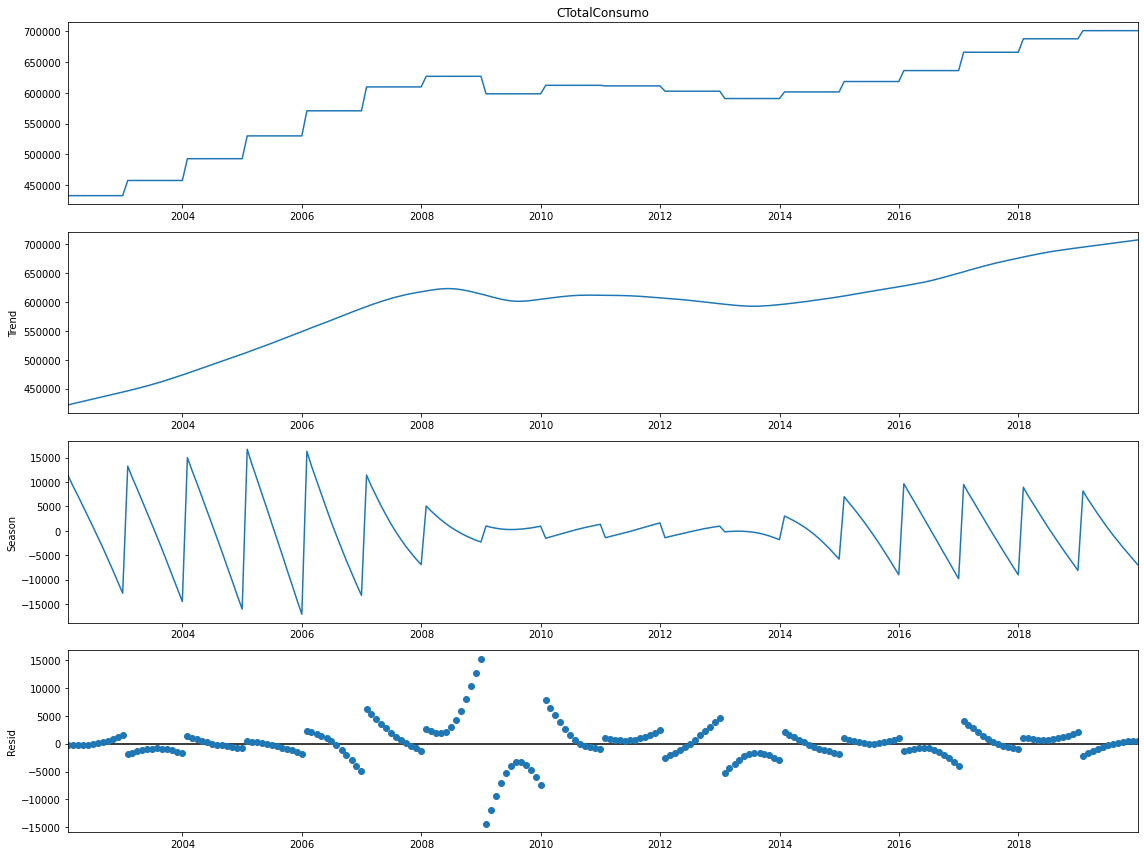

In [22]:
# Descomposición de series temporales

from statsmodels.tsa.seasonal import STL
for i in list_to_plot:
  plt.rc('figure',figsize=(16,12))
  plt.rc('font',size=10)
  Y = df[i].fillna(0)
  stl = STL(Y)
  res = stl.fit()
  fig = res.plot()

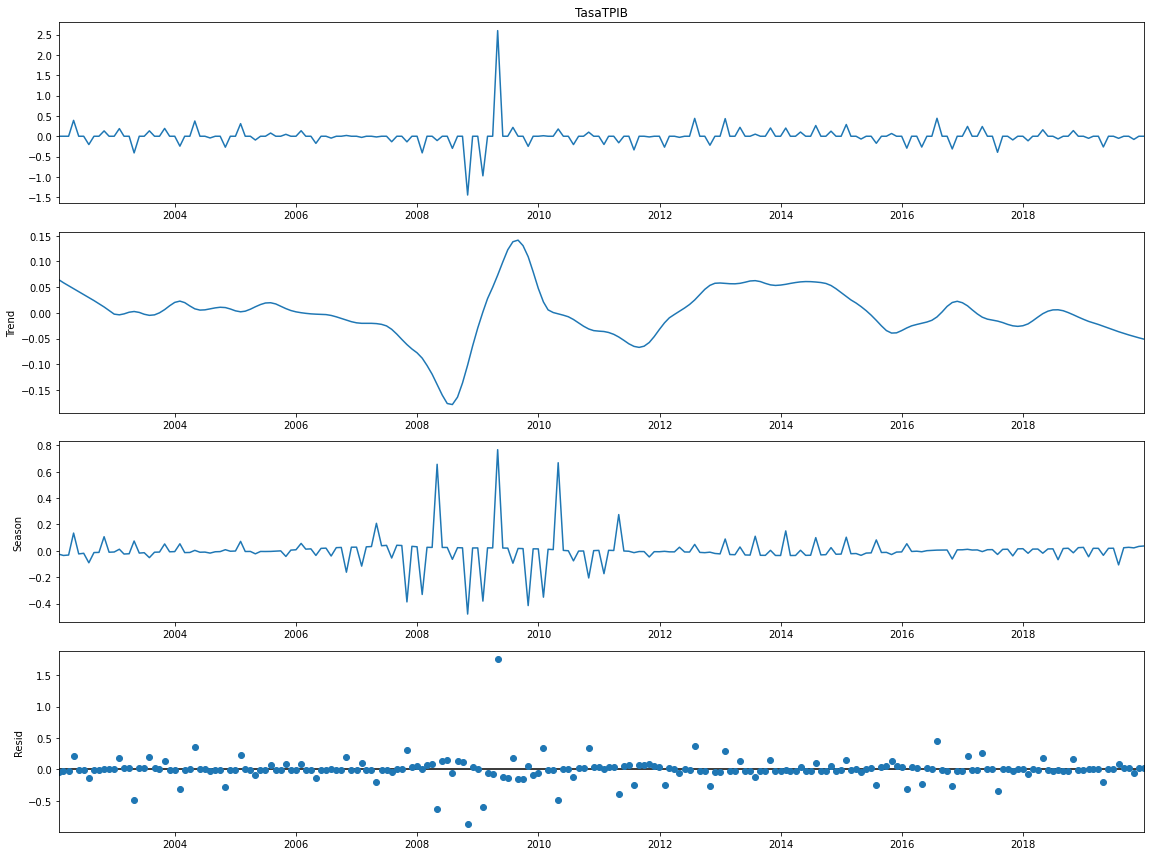

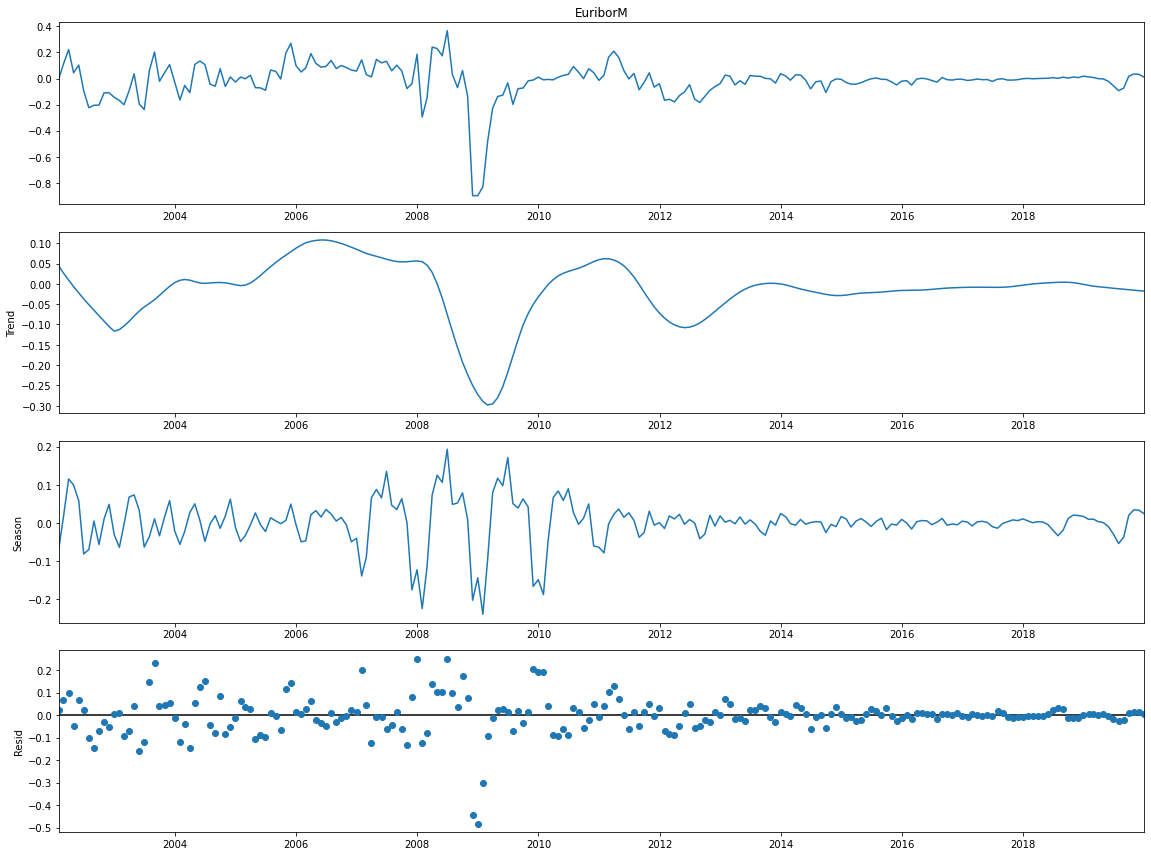

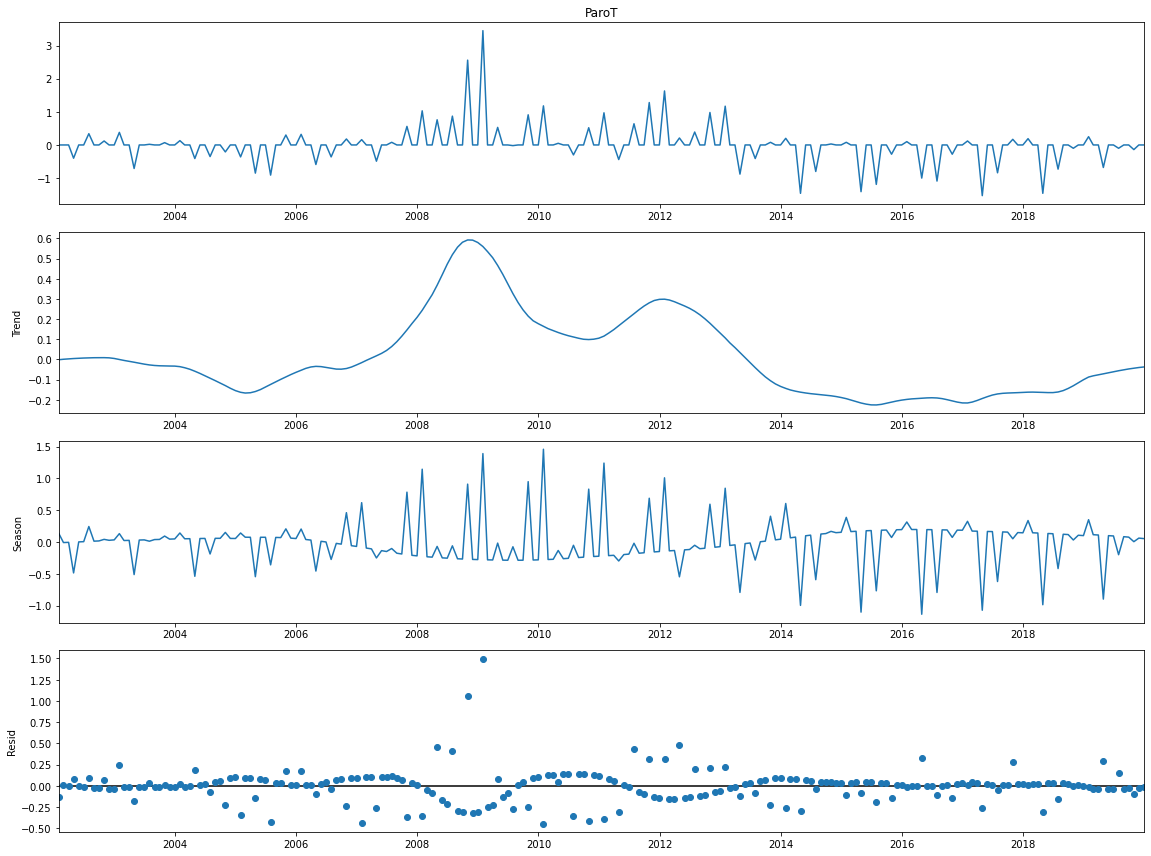

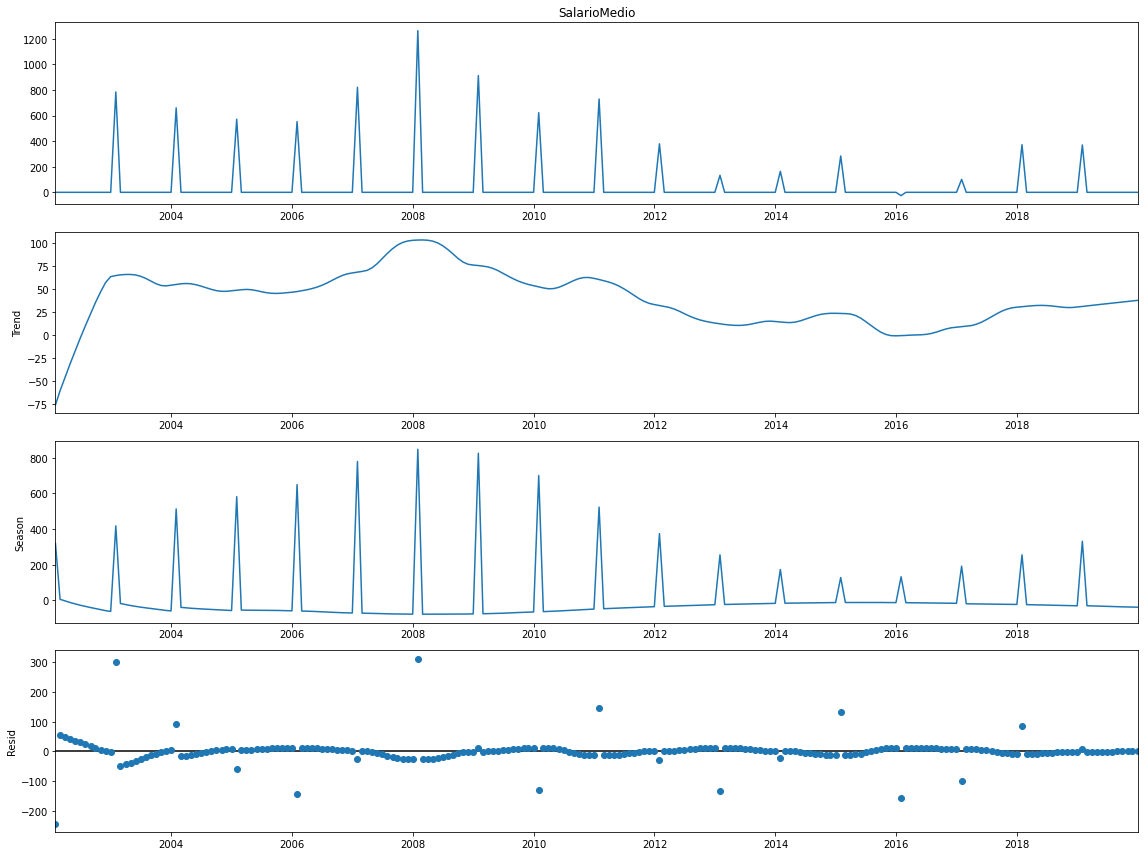

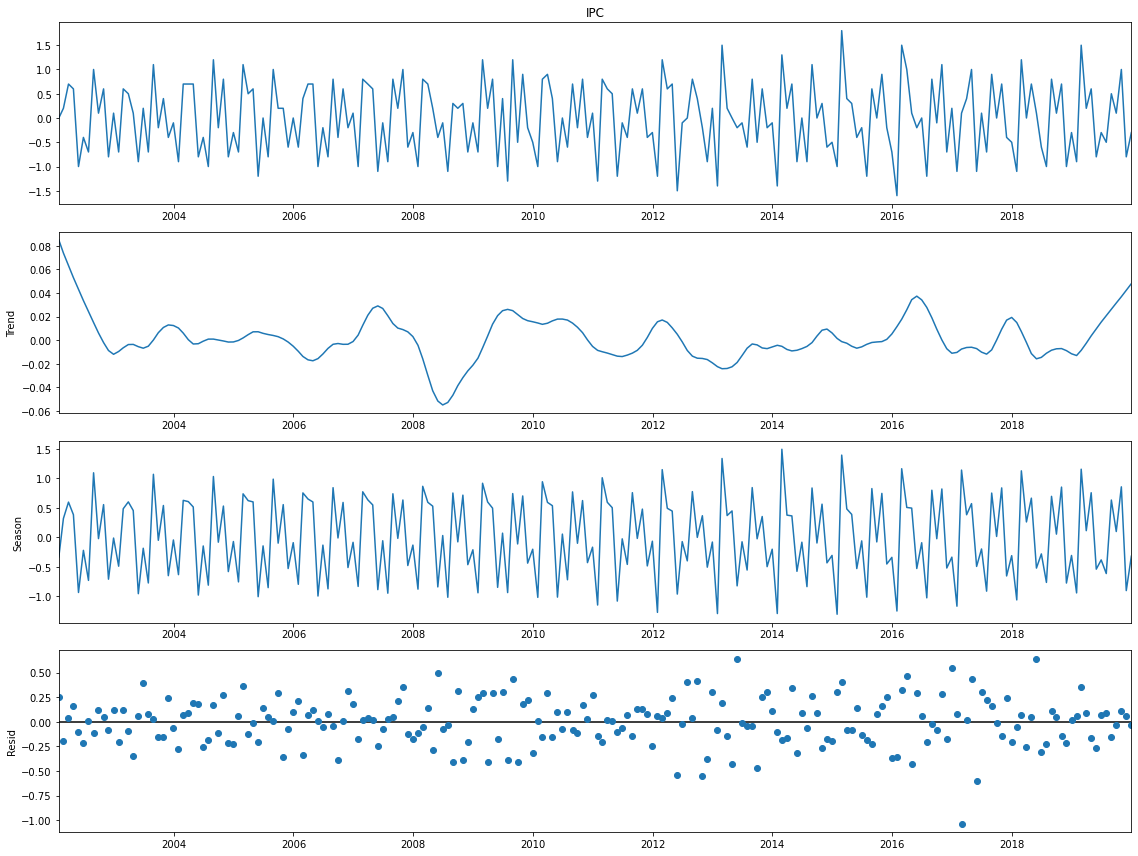

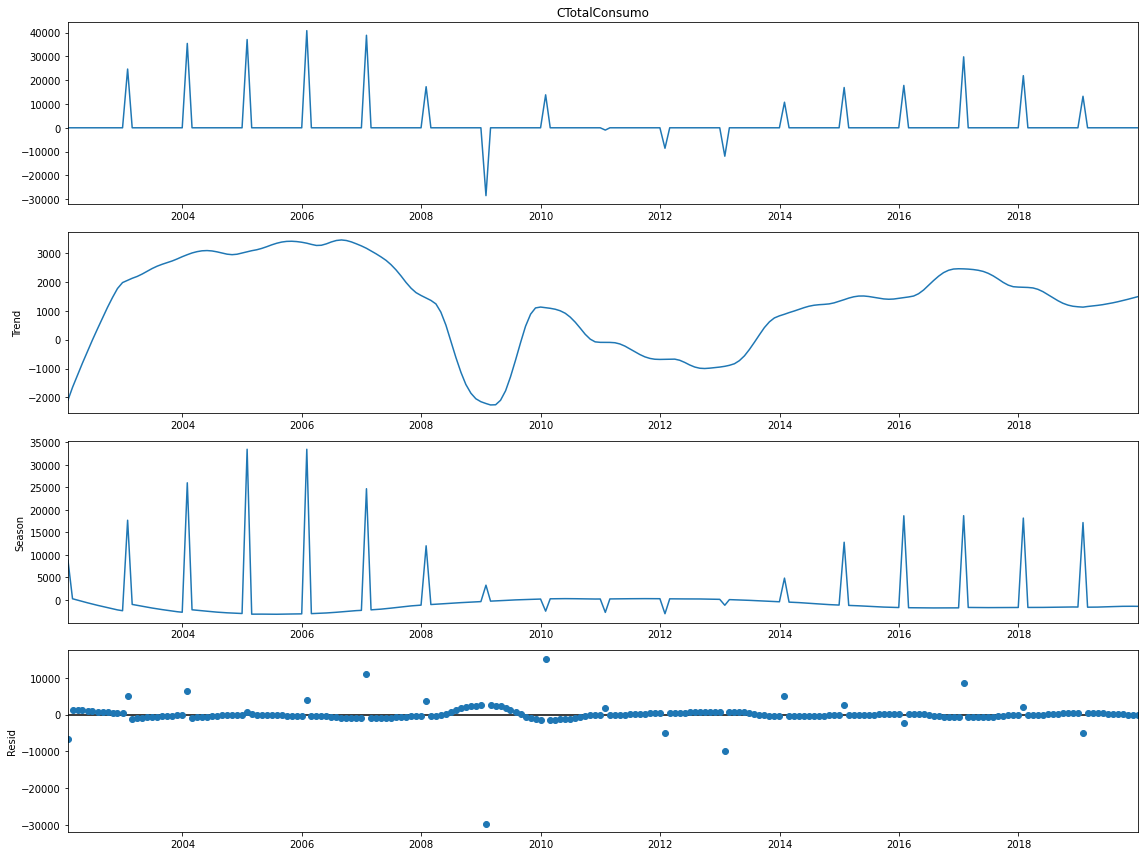

In [23]:
# Descomposición de series temporales

from statsmodels.tsa.seasonal import STL
for i in list_to_plot:
  plt.rc('figure',figsize=(16,12))
  plt.rc('font',size=10)
  Y = df_diff[i].fillna(0)
  stl = STL(Y)
  res = stl.fit()
  fig = res.plot()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:               TasaTPIB   No. Observations:                  215
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  -7.276
Date:                Sat, 28 Jan 2023   AIC                             20.552
Time:                        16:51:16   BIC                             30.650
Sample:                    02-28-2002   HQIC                            24.632
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0045      0.714      0.006      0.995      -1.394       1.403
ma.L1         -0.9996      0.694     -1.441      0.150      -2.359       0.360
sigma2         0.0611      0.043      1.432      0.1

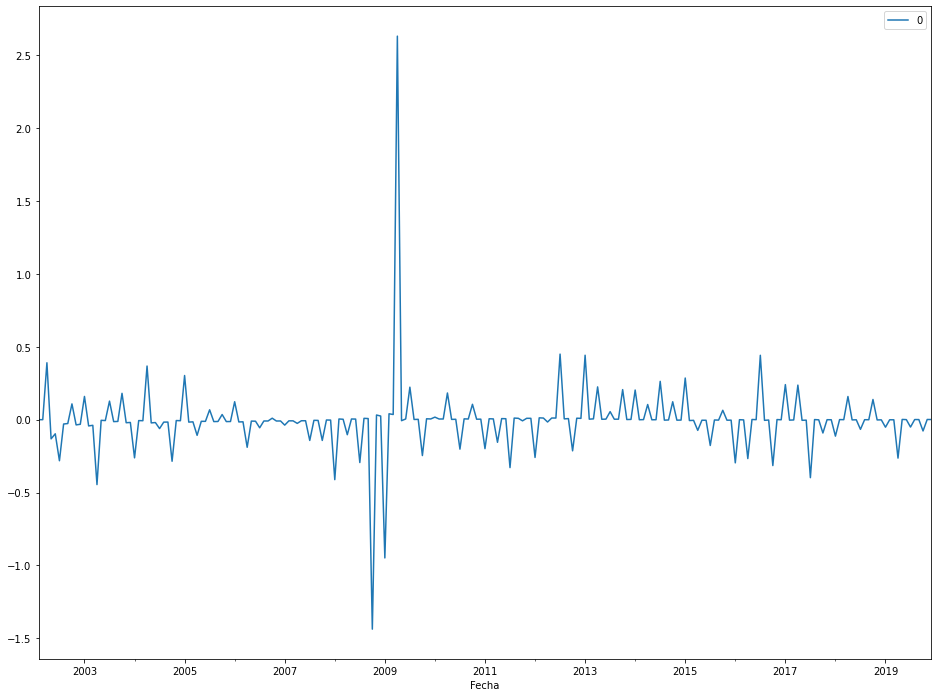

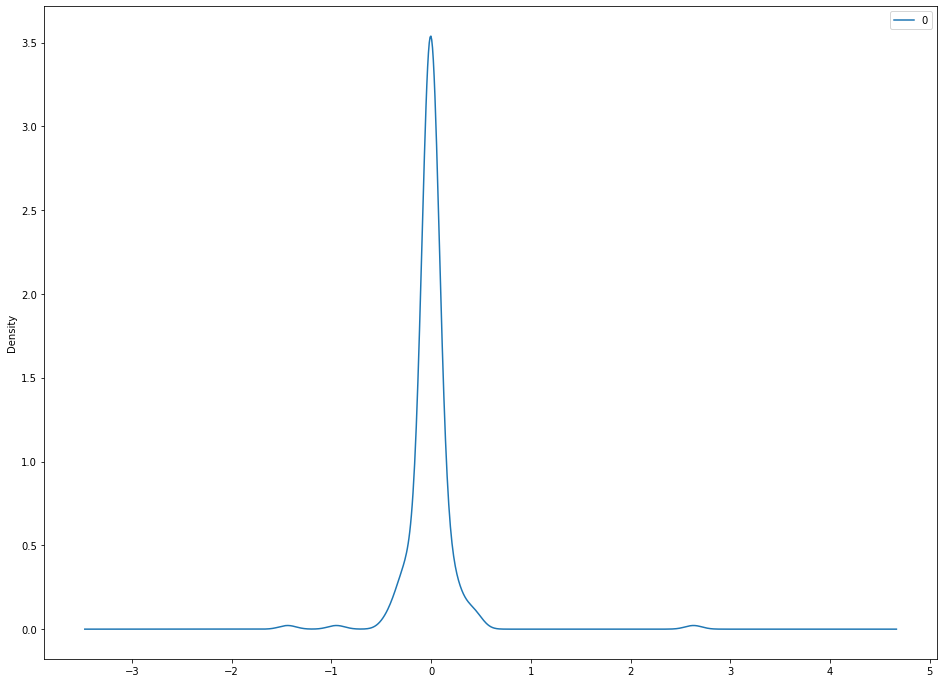

                0
count  215.000000
mean    -0.004464
std      0.249434
min     -1.436864
25%     -0.015185
50%     -0.001131
75%      0.005571
max      2.630892


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:               TasaTPIB   No. Observations:                  215
Model:                 ARIMA(1, 1, 2)   Log Likelihood                  -6.779
Date:                Sat, 28 Jan 2023   AIC                             21.558
Time:                        16:51:17   BIC                             35.022
Sample:                    02-28-2002   HQIC                            26.999
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8956      0.343     -2.608      0.009      -1.569      -0.223
ma.L1         -0.0741     26.865     -0.003      0.998     -52.729      52.581
ma.L2         -0.9258     24.594     -0.038      0.9

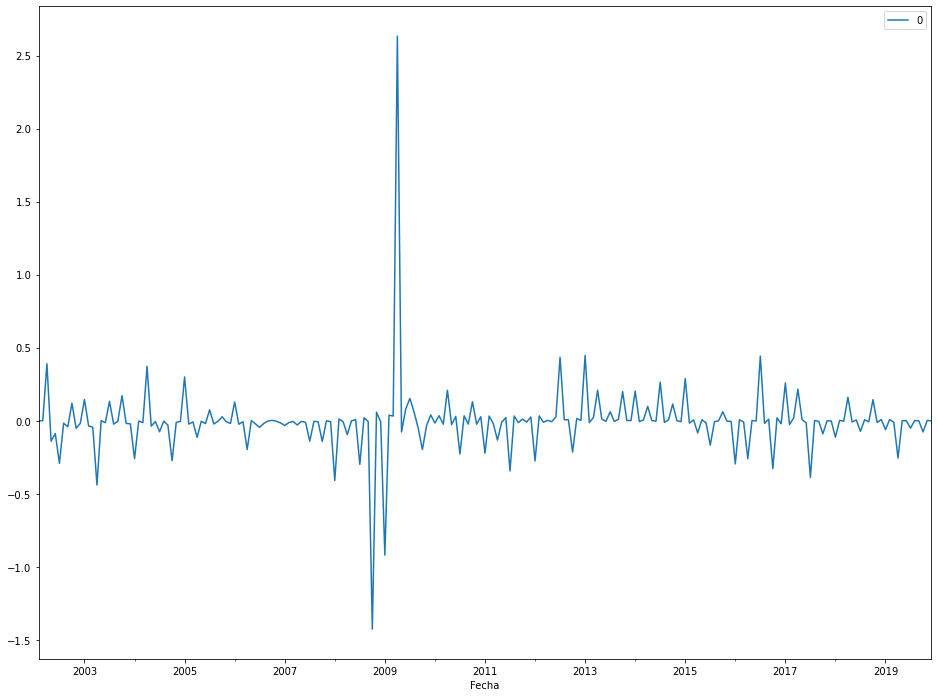

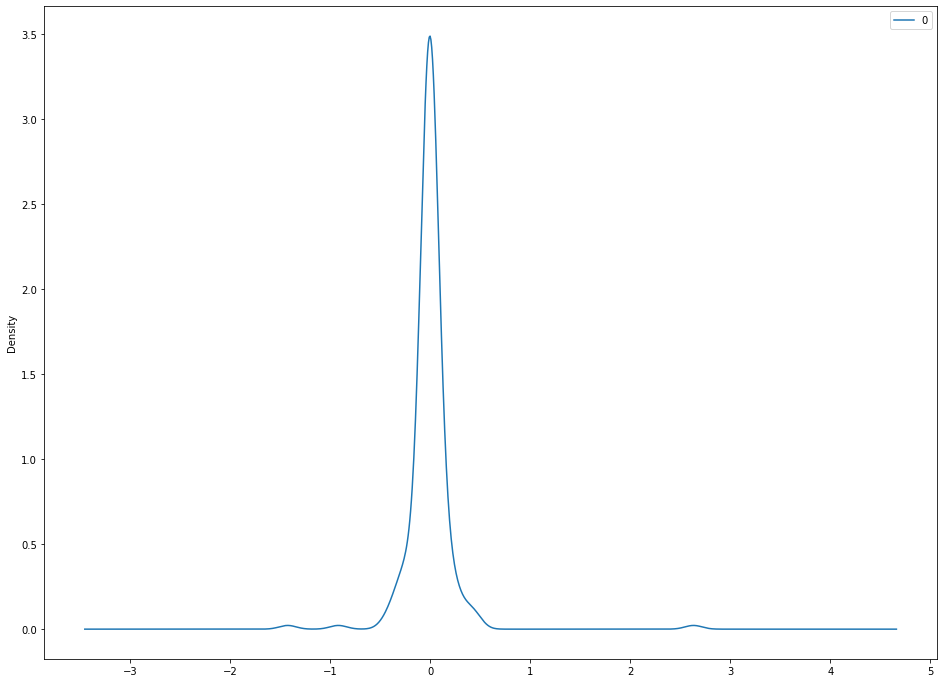

                0
count  215.000000
mean    -0.004530
std      0.248873
min     -1.426091
25%     -0.022782
50%     -0.003887
75%      0.011414
max      2.632774


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:               TasaTPIB   No. Observations:                  215
Model:                 ARIMA(2, 1, 1)   Log Likelihood                  -7.273
Date:                Sat, 28 Jan 2023   AIC                             22.547
Time:                        16:51:18   BIC                             36.011
Sample:                    02-28-2002   HQIC                            27.987
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0047      0.714      0.007      0.995      -1.394       1.404
ar.L2          0.0046      0.732      0.006      0.995      -1.430       1.440
ma.L1         -0.9999      1.895     -0.528      0.5

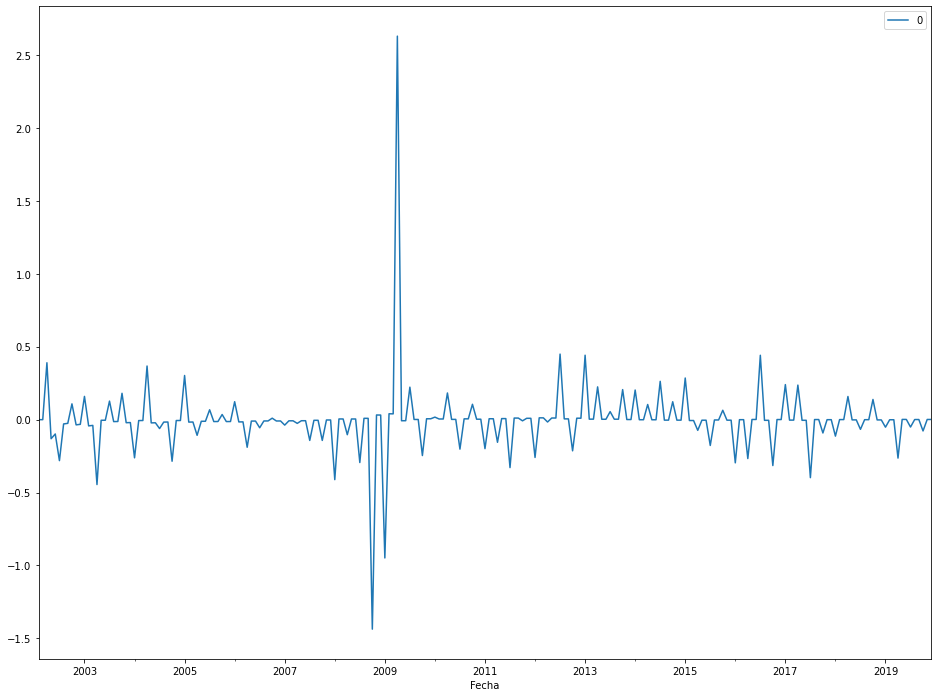

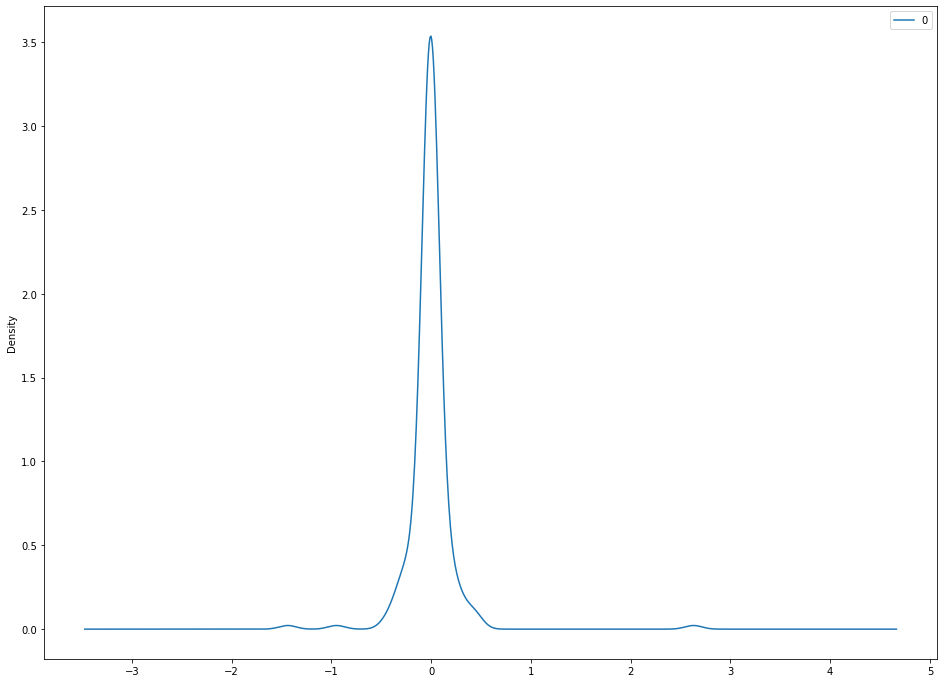

                0
count  215.000000
mean    -0.004435
std      0.249433
min     -1.436906
25%     -0.015773
50%     -0.001537
75%      0.005844
max      2.630709


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:               EuriborM   No. Observations:                  215
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 188.130
Date:                Sat, 28 Jan 2023   AIC                           -370.261
Time:                        16:51:19   BIC                           -360.163
Sample:                    02-28-2002   HQIC                          -366.180
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7281      0.039     18.756      0.000       0.652       0.804
ma.L1         -1.0000     13.263     -0.075      0.940     -26.995      24.995
sigma2         0.0099      0.132      0.075      0.9

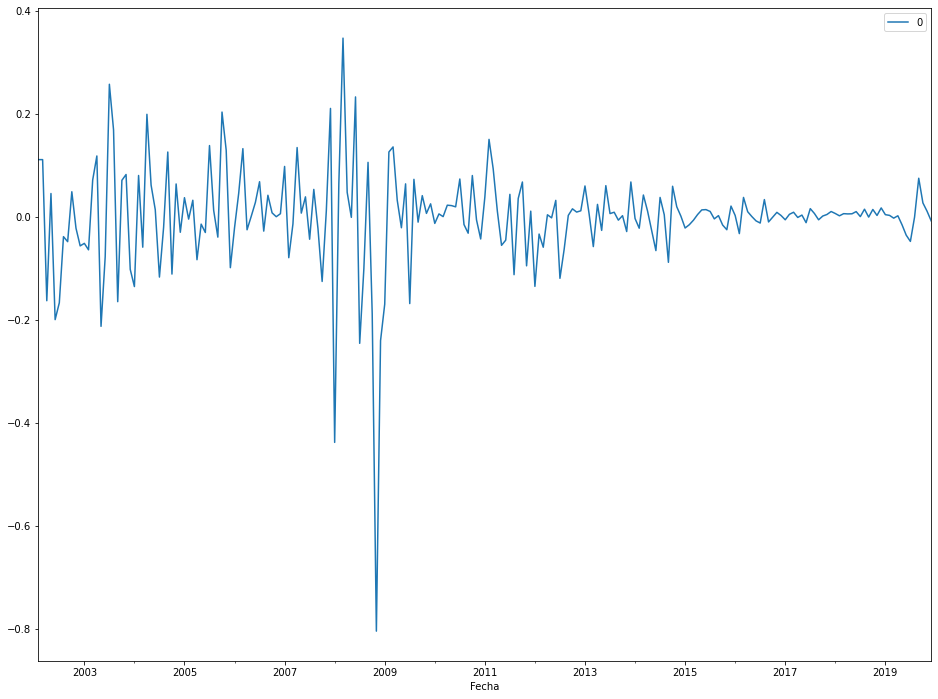

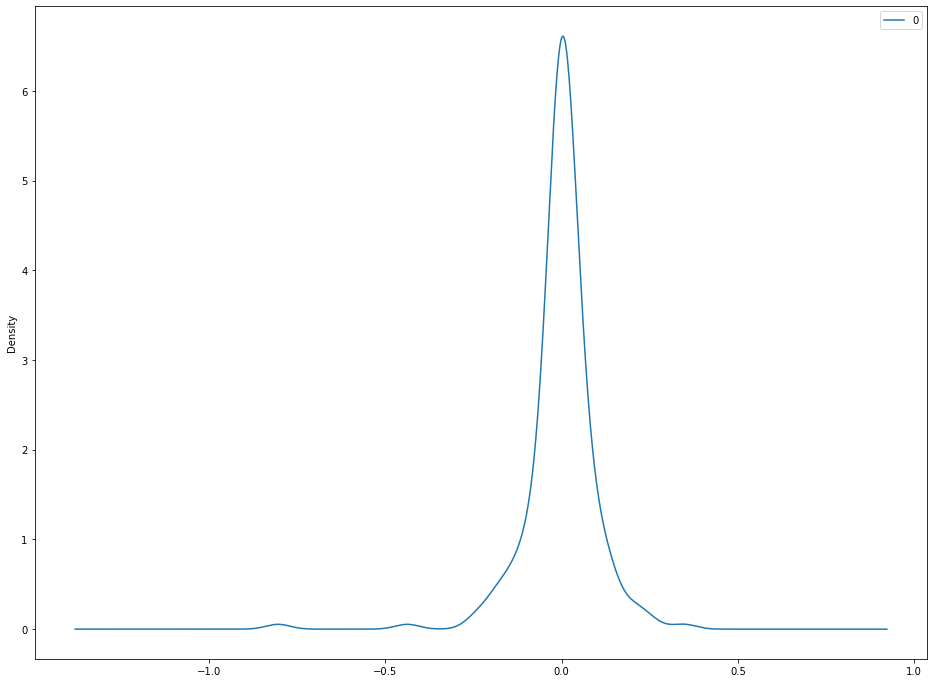

                0
count  215.000000
mean    -0.001659
std      0.100967
min     -0.804327
25%     -0.025129
50%      0.003953
75%      0.034505
max      0.346833


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:               EuriborM   No. Observations:                  215
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 190.546
Date:                Sat, 28 Jan 2023   AIC                           -373.093
Time:                        16:51:20   BIC                           -359.629
Sample:                    02-28-2002   HQIC                          -367.652
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6027      0.051     11.933      0.000       0.504       0.702
ma.L1         -0.7423      8.001     -0.093      0.926     -16.423      14.939
ma.L2         -0.2577      2.065     -0.125      0.9

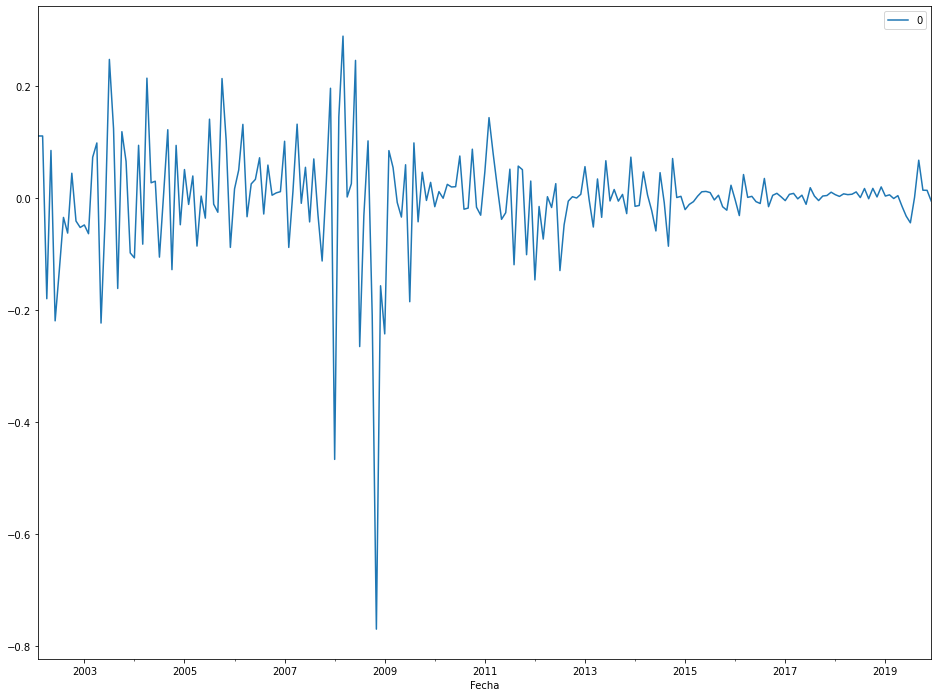

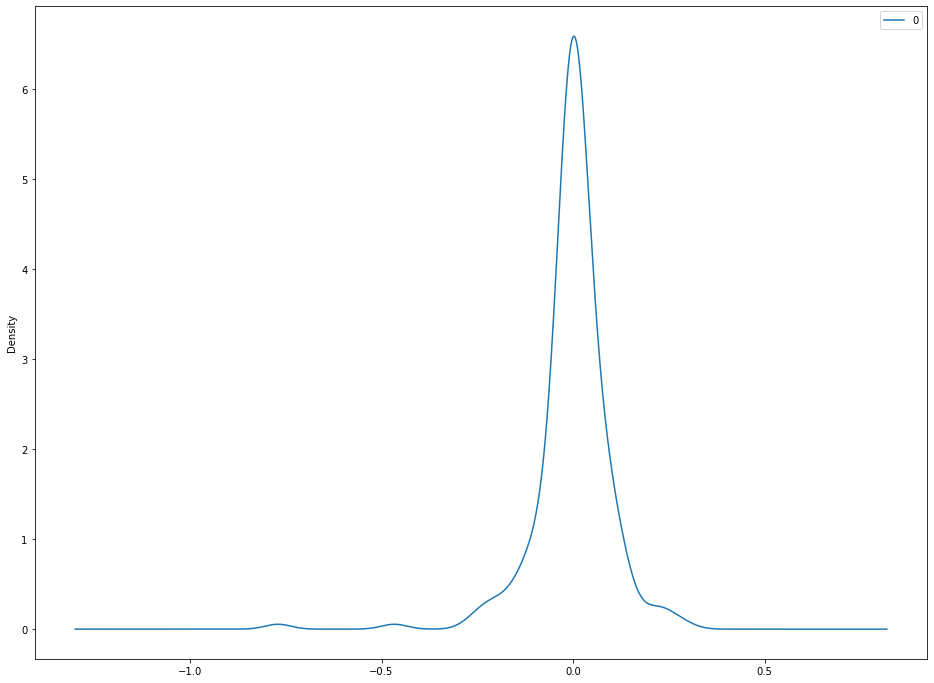

                0
count  215.000000
mean    -0.001003
std      0.099918
min     -0.770049
25%     -0.025686
50%      0.003602
75%      0.034670
max      0.289377
                               SARIMAX Results                                
Dep. Variable:               EuriborM   No. Observations:                  215
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 181.570
Date:                Sat, 28 Jan 2023   AIC                           -355.139
Time:                        16:51:21   BIC                           -341.675
Sample:                    02-28-2002   HQIC                          -349.699
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1951      0.138     -1.414     

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


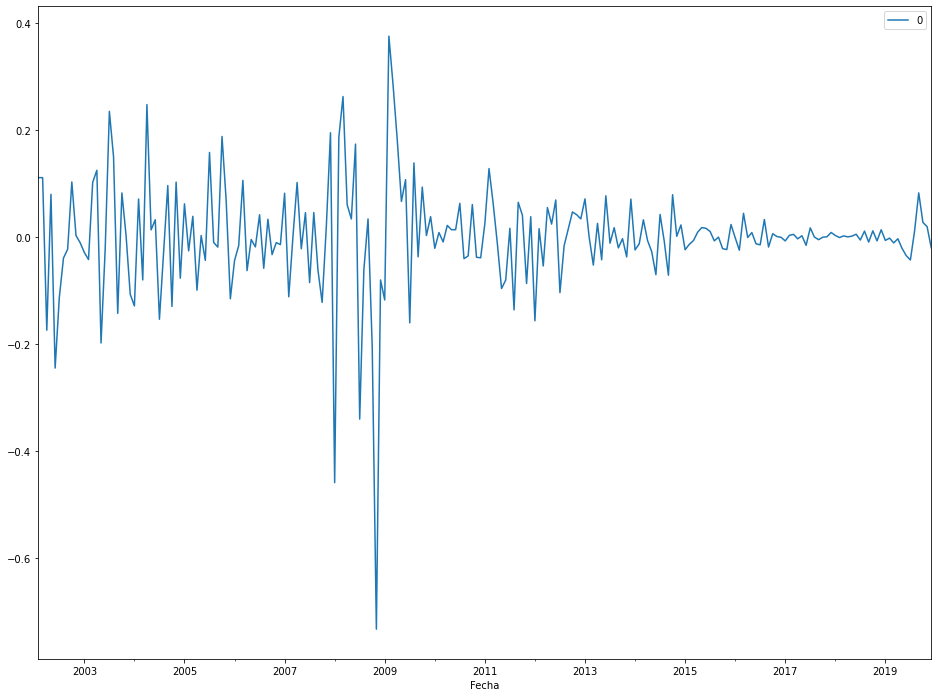

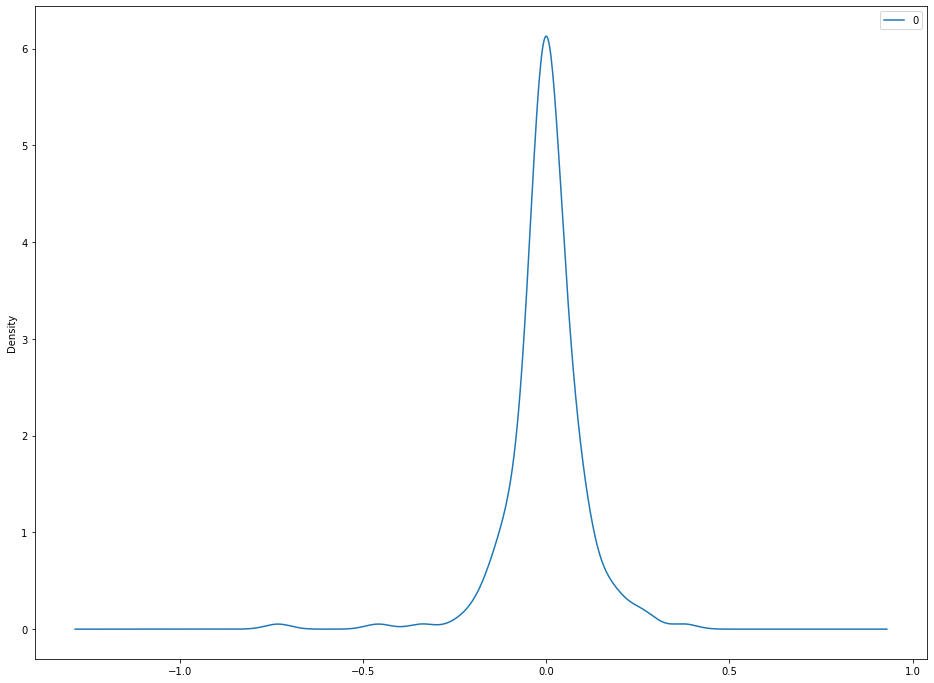

                0
count  215.000000
mean    -0.000044
std      0.103890
min     -0.732990
25%     -0.026541
50%      0.000039
75%      0.038016
max      0.375508


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                    IPC   No. Observations:                  215
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -235.904
Date:                Sat, 28 Jan 2023   AIC                            477.809
Time:                        16:51:22   BIC                            487.907
Sample:                    02-28-2002   HQIC                           481.889
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0000      0.000  -6103.485      0.000      -1.000      -1.000
ma.L1          0.9981      0.130      7.658      0.000       0.743       1.254
sigma2         0.5211      0.075      6.985      0.0

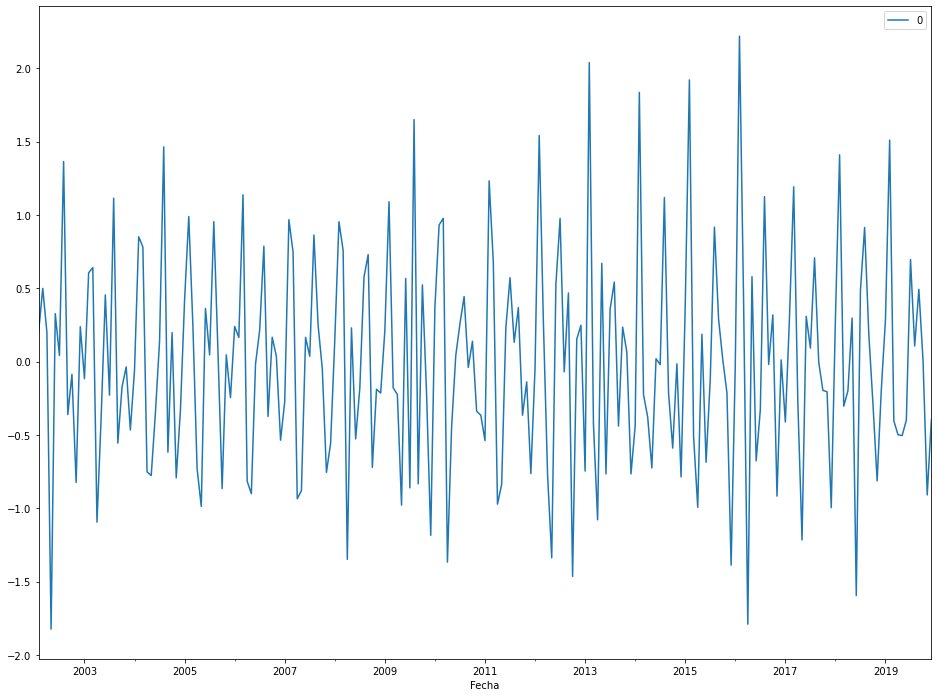

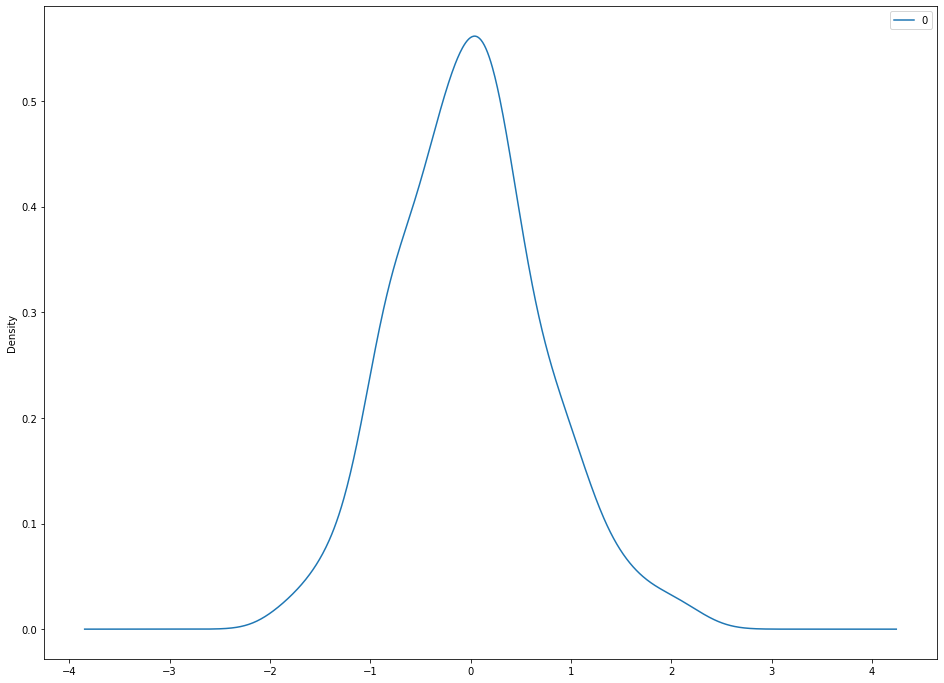

                0
count  215.000000
mean    -0.003340
std      0.728160
min     -1.824530
25%     -0.482219
50%     -0.014510
75%      0.386693
max      2.220568


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                    IPC   No. Observations:                  215
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -190.783
Date:                Sat, 28 Jan 2023   AIC                            389.566
Time:                        16:51:23   BIC                            403.030
Sample:                    02-28-2002   HQIC                           395.007
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0000      0.001  -1600.885      0.000      -1.001      -0.999
ma.L1         -0.0006      3.392     -0.000      1.000      -6.649       6.648
ma.L2         -0.9989      3.543     -0.282      0.7

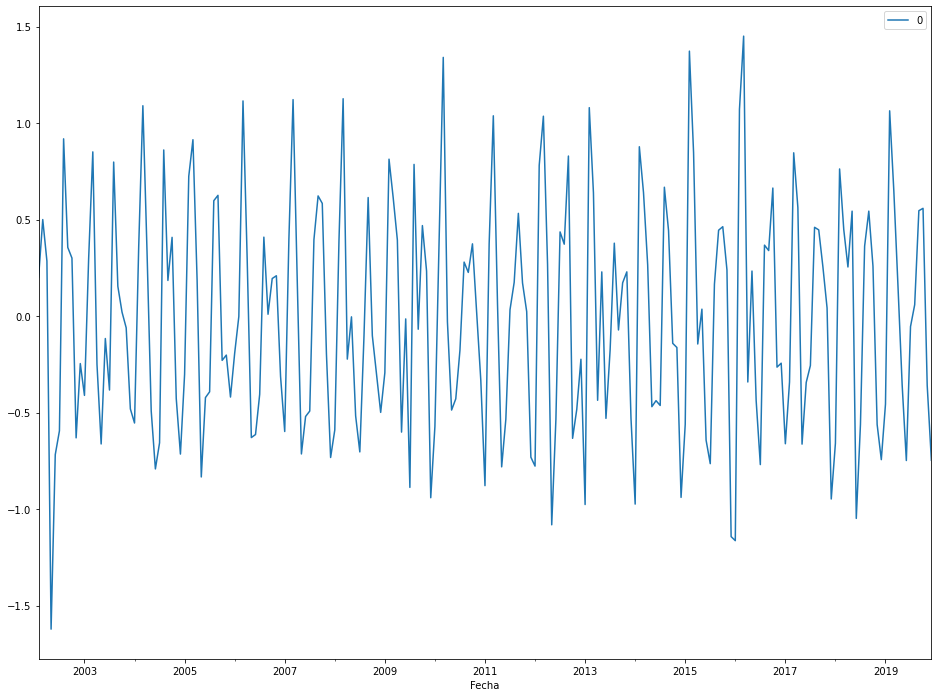

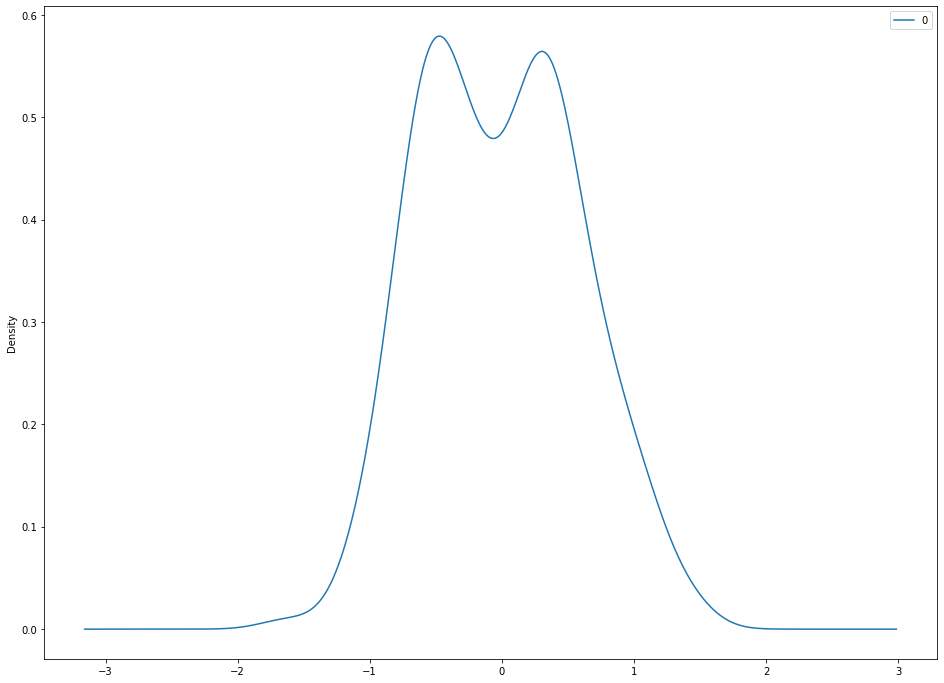

                0
count  215.000000
mean    -0.009489
std      0.591114
min     -1.621965
25%     -0.492152
50%     -0.003976
75%      0.403133
max      1.450333


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                    IPC   No. Observations:                  215
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -231.844
Date:                Sat, 28 Jan 2023   AIC                            471.687
Time:                        16:51:24   BIC                            485.151
Sample:                    02-28-2002   HQIC                           477.128
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2259      0.088     -2.576      0.010      -0.398      -0.054
ar.L2          0.0504      0.088      0.576      0.565      -0.121       0.222
ma.L1         -1.0000     51.329     -0.019      0.9

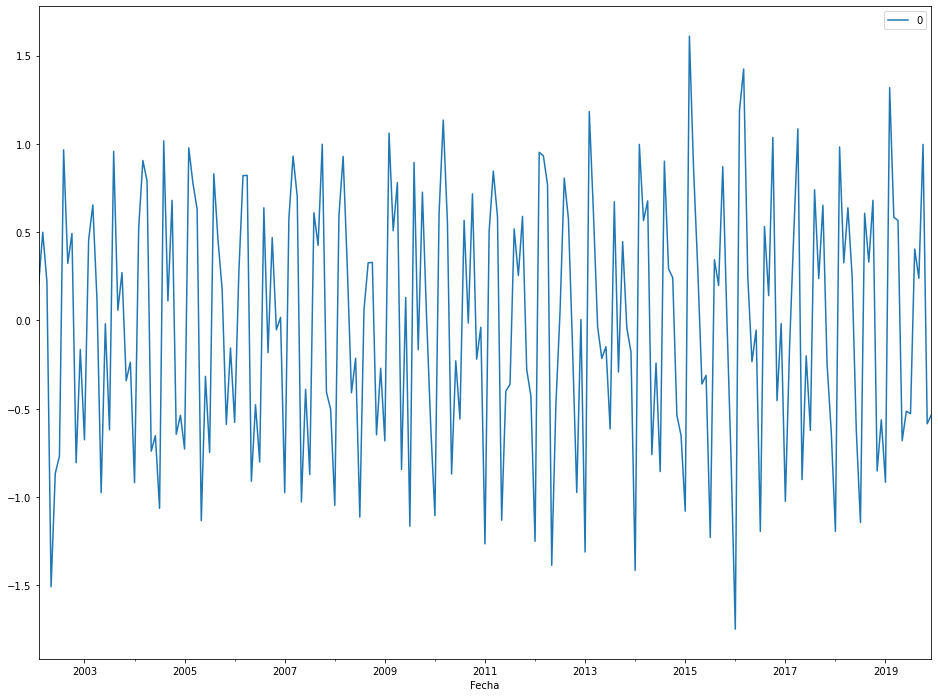

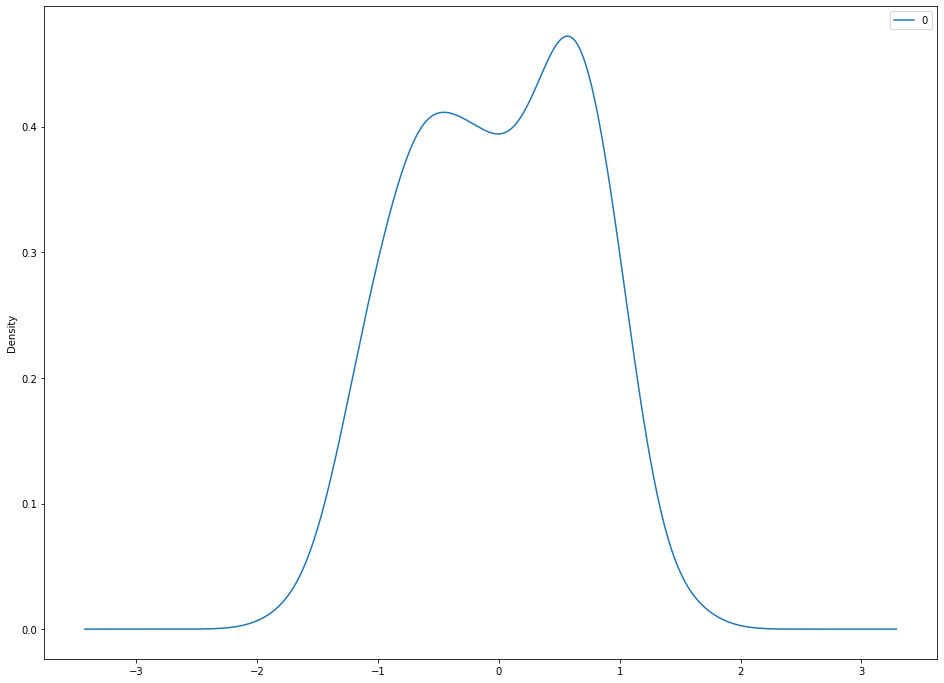

                0
count  215.000000
mean    -0.013377
std      0.714124
min     -1.747288
25%     -0.606615
50%     -0.000752
75%      0.588174
max      1.609705


In [24]:
# define list_to_plot
list_to_plot = ['TasaTPIB','EuriborM','IPC']  

# define order_model
order_model = [(1,1,1), (1,1,2), (2,1,1)]

# Ejecuta todos los posibles modelos del order model, para todas las variables y devuelve el Modelo que mejor se ajusta

best_model = {}
model_results = []
for i in list_to_plot:
  counter = 0
  previous_best_aic_model = 0
  for j in order_model:
    # fit model
    model = sm.tsa.arima.ARIMA(df_diff[i].dropna(), order=j, dates=np.array(df_diff.reset_index().Fecha[1:]), freq='M')
    model_fit = model.fit()
    model_results.append(("TasaTPIB", i, " Model AIC ", model_fit.aic, " Model Specification ", j))
    if counter == 0:
      previous_best_aic_model = model_fit.aic
      best_model[i] = j
      counter +=1
    else:
      if previous_best_aic_model > model_fit.aic:
        previous_best_aic_model = model_fit.aic
        best_model[i] = j
        counter +=1
      else:
        counter+=1
    # summary of fit model
    print(model_fit.summary())
    # line plot of residuals
    residuals = pd.DataFrame(model_fit.resid) 
    residuals.plot()
    plt.show()
    # density plot of residuals 
    residuals.plot(kind='kde') 
    plt.show()
    # summary stats of residuals
    print(residuals.describe())


In [25]:
# Se imprime el mejor modelo para cada variable

best_model

{'TasaTPIB': (1, 1, 1), 'EuriborM': (1, 1, 2), 'IPC': (1, 1, 2)}

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:               TasaTPIB   No. Observations:                  215
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  -7.276
Date:                Sat, 28 Jan 2023   AIC                             20.552
Time:                        16:51:25   BIC                             30.650
Sample:                    02-28-2002   HQIC                            24.632
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0045      0.714      0.006      0.995      -1.394       1.403
ma.L1         -0.9996      0.694     -1.441      0.150      -2.359       0.360
sigma2         0.0611      0.043      1.432      0.1

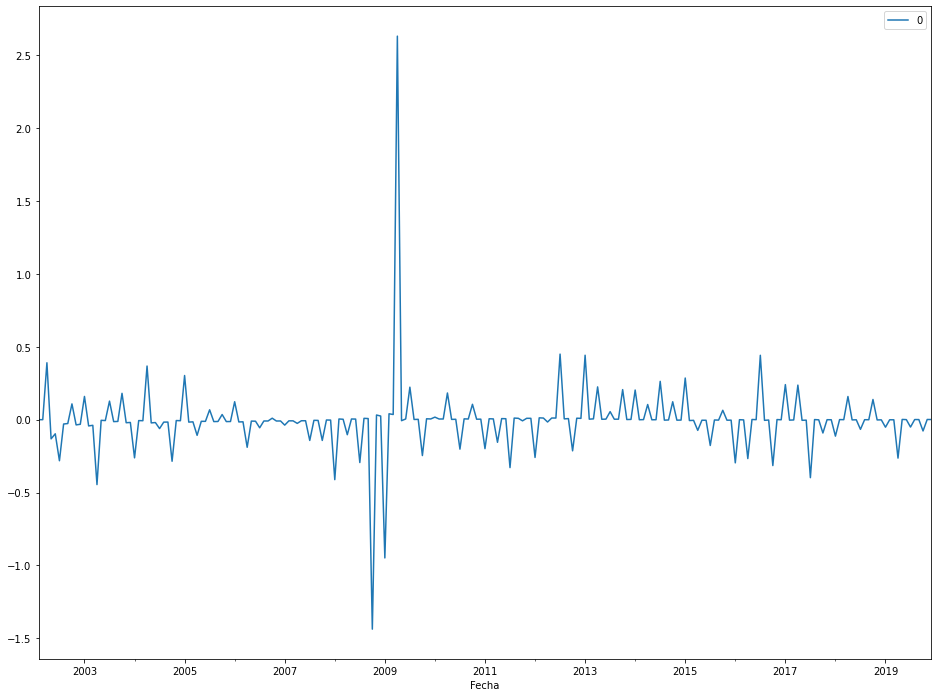

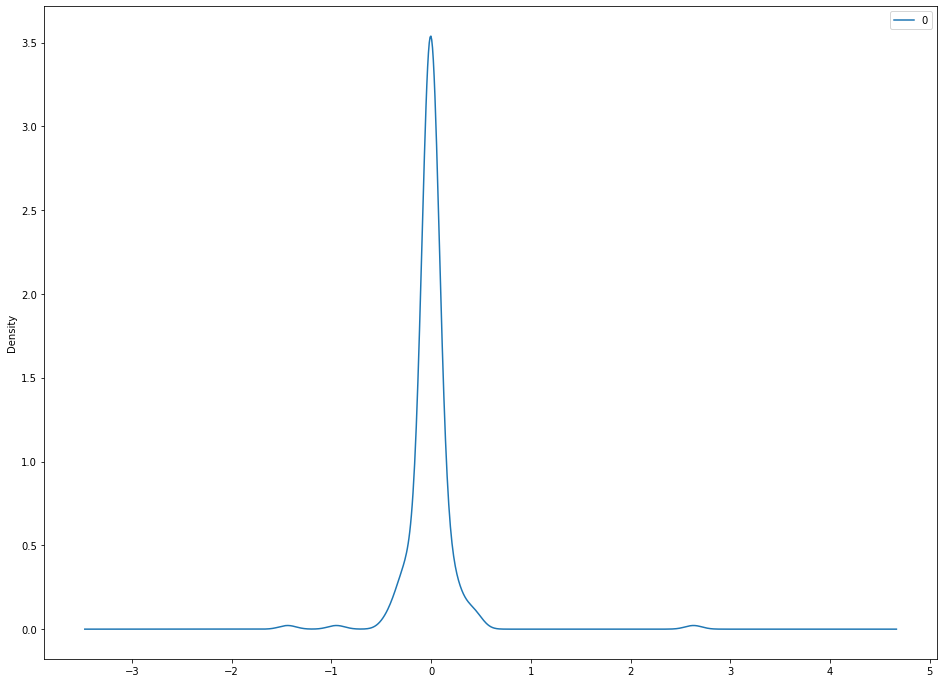

                0
count  215.000000
mean    -0.004464
std      0.249434
min     -1.436864
25%     -0.015185
50%     -0.001131
75%      0.005571
max      2.630892


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:               EuriborM   No. Observations:                  215
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 190.546
Date:                Sat, 28 Jan 2023   AIC                           -373.093
Time:                        16:51:26   BIC                           -359.629
Sample:                    02-28-2002   HQIC                          -367.652
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6027      0.051     11.933      0.000       0.504       0.702
ma.L1         -0.7423      8.001     -0.093      0.926     -16.423      14.939
ma.L2         -0.2577      2.065     -0.125      0.9

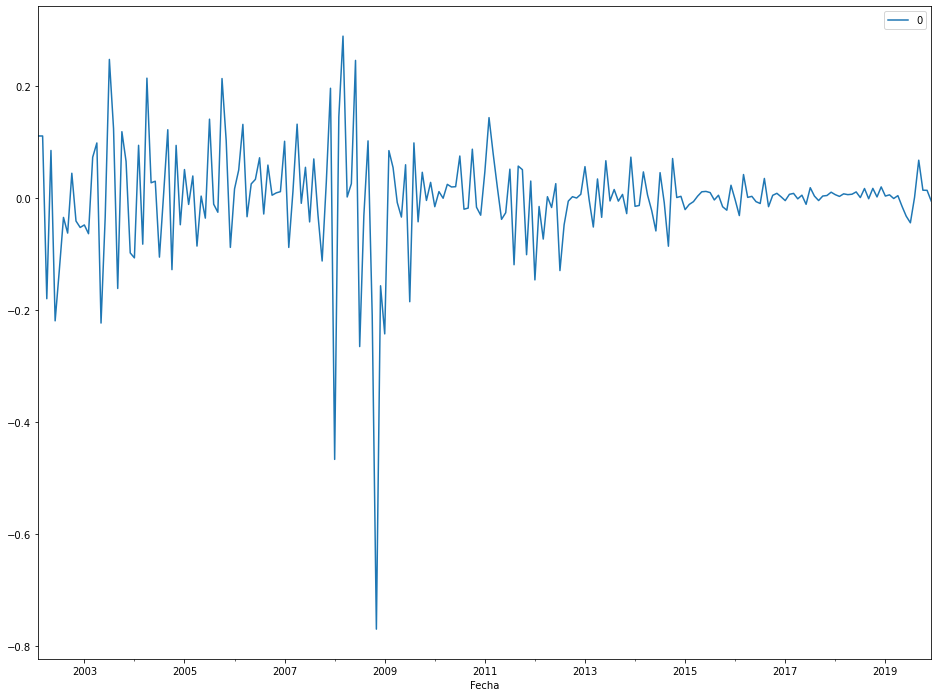

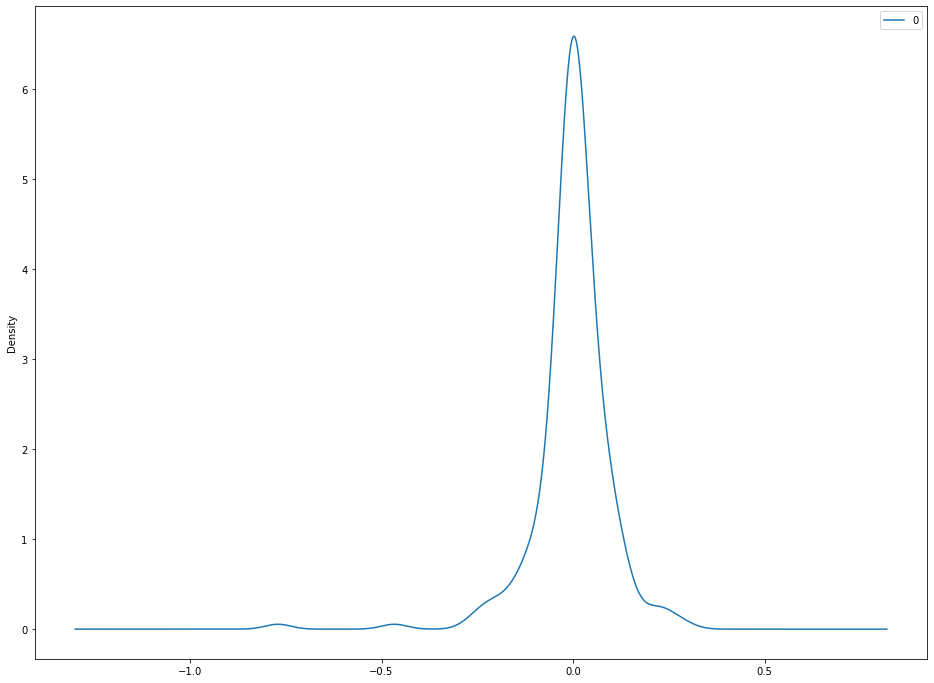

                0
count  215.000000
mean    -0.001003
std      0.099918
min     -0.770049
25%     -0.025686
50%      0.003602
75%      0.034670
max      0.289377


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization 

                               SARIMAX Results                                
Dep. Variable:                    IPC   No. Observations:                  215
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -190.783
Date:                Sat, 28 Jan 2023   AIC                            389.566
Time:                        16:51:27   BIC                            403.030
Sample:                    02-28-2002   HQIC                           395.007
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0000      0.001  -1600.885      0.000      -1.001      -0.999
ma.L1         -0.0006      3.392     -0.000      1.000      -6.649       6.648
ma.L2         -0.9989      3.543     -0.282      0.7

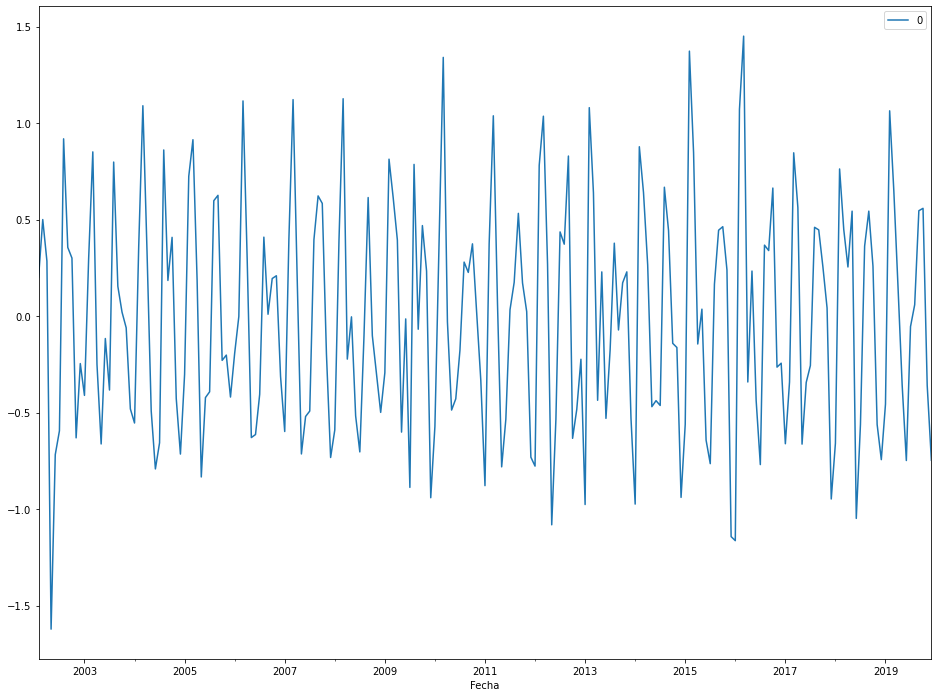

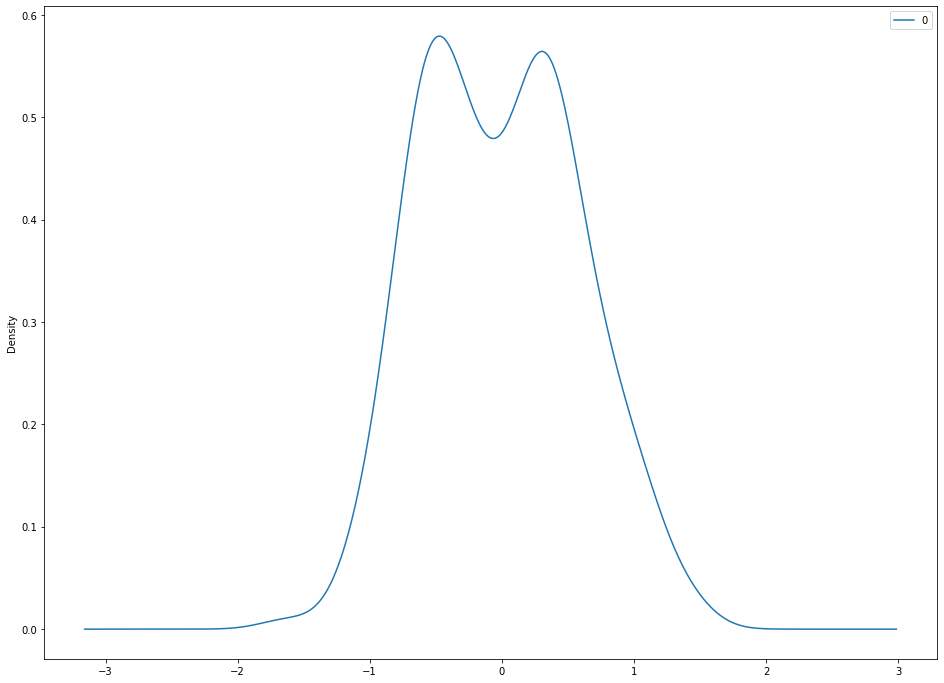

                0
count  215.000000
mean    -0.009489
std      0.591114
min     -1.621965
25%     -0.492152
50%     -0.003976
75%      0.403133
max      1.450333


In [26]:
# Imprime un resumen con el mejor modelo ARIMA para cada variable

for key in best_model:
  model = sm.tsa.arima.ARIMA(df_diff[key].dropna(), order=best_model[key])
  model_fit = model.fit()
  # print(model_fit.aic, i, j)
  # summary of fit model
  print(model_fit.summary())
  # line plot of residuals
  residuals = pd.DataFrame(model_fit.resid) 
  residuals.plot()
  plt.show()
  # density plot of residuals 
  residuals.plot(kind='kde') 
  plt.show()
  # summary stats of residuals
  print(residuals.describe())

In [27]:
# Modelado para predicción con Df.diff

# {'TasaTPIB': (1, 1, 1), 'EuriborM': (1, 1, 2), 'IPC': (1, 1, 2)}

PIB_model = sm.tsa.arima.ARIMA(df_diff['TasaTPIB'].dropna(), order=(1, 1, 1 ))
PIB_fit = PIB_model.fit()
Euribor_model = sm.tsa.arima.ARIMA(df_diff['EuriborM'].dropna(), order=(1, 1, 2))
Euribor_fit = Euribor_model.fit()
IPC_model = sm.tsa.arima.ARIMA(df_diff['IPC'].dropna(), order=(1, 1, 2))
IPC_fit = IPC_model.fit()


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so in

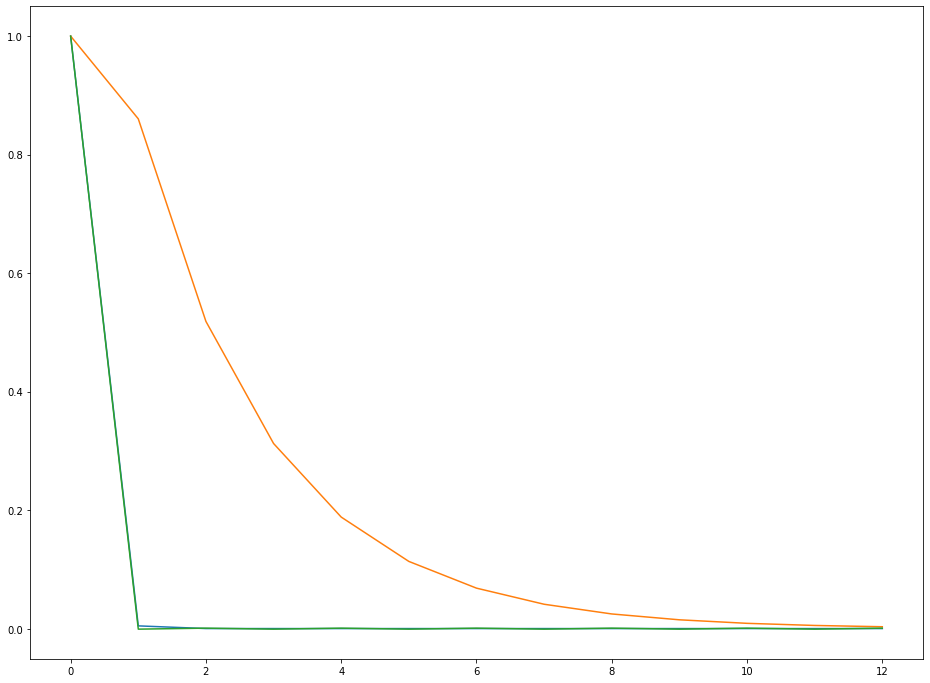

In [28]:
#PIB model
PIB_model_impulse = PIB_model.impulse_responses(params=PIB_fit.params, steps=12, cumulative=False)
PIB_model_impulse.plot()
     
#Euribor model
Euribor_model_impulse = Euribor_model.impulse_responses(params=Euribor_fit.params, steps=12, cumulative=False)
Euribor_model_impulse.plot()

#IPC model
IPC_model_impulse = IPC_model.impulse_responses(params=IPC_fit.params, steps=12, cumulative=False)
IPC_model_impulse.plot()


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be use

216
Ejemplos usados para entrenar:  204
Ejemplos usados para test:  12
Intervalo de predicción: [-0.48591726370025395, 0.48077706920056423]
MSE:  0.1579699978561337


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


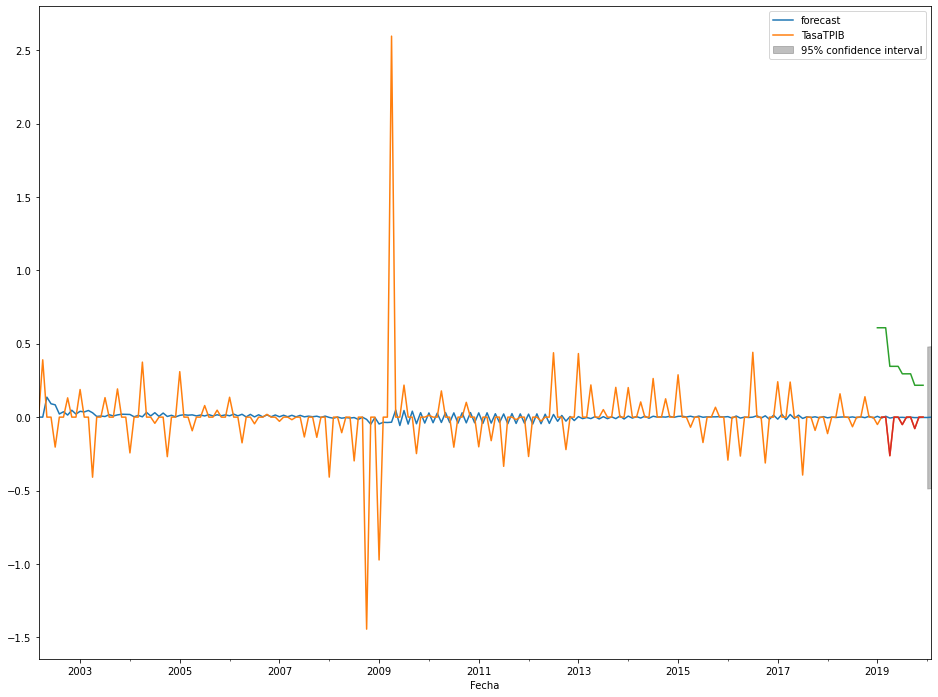

In [30]:
PIB_model = ARIMA(df_diff['TasaTPIB'].dropna(), order=(1, 1, 2))
PIB_fit = PIB_model.fit()
print(len(df_diff))

end = len(df)
PIB_model_impulse = PIB_fit.plot_predict(end=end)

m_train = 12

df_train = df[:-m_train] 
df_test = df[-m_train:]

print("Ejemplos usados para entrenar: ", len(df_train))
print("Ejemplos usados para test: ", len(df_test))

df_test['TasaTPIB'].dropna().plot() #azúl

df_test['TasaTPIB'].diff().dropna().plot() #Naranja

pred, stderr, conf_int = PIB_fit.forecast(steps=12)
print("Intervalo de predicción: [{}, {}]".format(conf_int[0][0], conf_int[0][1]))

y_true = df_test['TasaTPIB'].dropna()
y_pred = pred

mse = mean_squared_error(y_true, y_pred)
print("MSE: ", mse)
